In [1]:
import sys; sys.path.insert(0, '..')
from cmdp.consMDP import ConsMDP
from cmdp import dot
from cmdp import energy_solver
dot.dotpr = 'neato'
from cmdp import fixpoints

In [2]:
def consMDP_flower(cap=8):
    m = ConsMDP()
    m.new_states(2)
    m.add_action(1,{0:1},"a",1)
    m.add_action(0,{1:1},"t",cap)
    m.set_reload(1)

    for c in range(1,cap):
        s = m.new_state(reload=True)
        m.add_action(0,{s:1},f"{s}",cap-c)
        m.add_action(s,{0:1},"a",c-1)
    return m

[1, 0, 0, 0, 0, 0, 0, 0, 0]


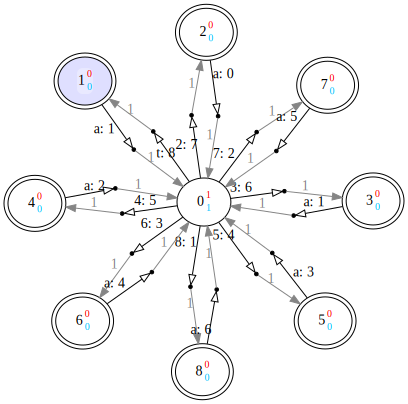

In [3]:
m = consMDP_flower()
print(m.get_positiveReachability(set([1]), 8))
m

## Double flower shaped consMDP
Computing positive reachability may involve up to quadratic number of fixpoint-iterations (and thus cubic complexity in general). To be more precise, for $R$ being the set of reloads and $Q$ being the set of non-reload staes, the number of iterations $i$ is:
$$
i = |R| \cdot \frac{|P|}{2}
$$

In [4]:
def consMDP_double_flower(cap=32,path=3):
    m = ConsMDP()
    m.new_states(2)
    #m.add_action(1,{0:1},"a",1)
    #m.add_action(0,{1:1},"t",cap)

    for c in range(2,cap, 2):
        s = m.new_state(reload=True, label = f"{c}")
        h = (c//2) % 2
        m.add_action(h,{s:1},f"{s}",cap-c)
        m.add_action(s,{h:1},"a",c-1)
        
    prev_o = 1
    prev_e = 0
    for p in range(path):
        curr_o = m.new_state()
        curr_e = m.new_state()

        m.add_action(prev_o,{curr_o:1},"p",0)
        m.add_action(prev_e,{curr_e:1},"p",0)
        
        prev_o = curr_o
        prev_e = curr_e
        
    m.add_action(prev_o,{0:1},"p",1)
    m.add_action(prev_e,{1:1},"p",1)
    
    return m

[31, 30, 0, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31, 32, 31]


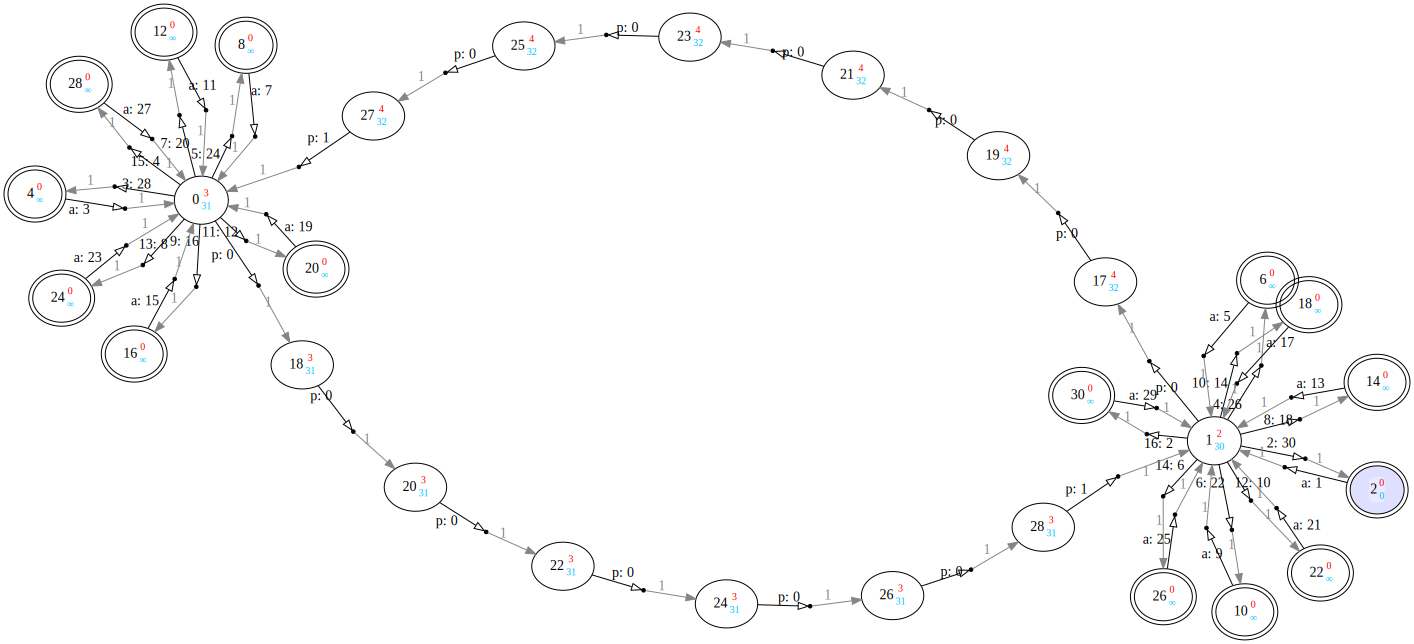

In [5]:
cap = 32 # We have cap/2 reload states, cap/4 in each flower
path = 6
m = consMDP_double_flower(cap, path)
# This will yield ∞ for most states, we need at least cap+2
print(m.get_positiveReachability(set([2]), cap))
m

[3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3]


it 0	:[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
it 1	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 5, 3]
it 2	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, inf, inf, 5, 3, 5, 3]
it 3	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, inf, inf, 5, 3, 5, 3, 5, 3]
it 4	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, inf, inf, 5, 3, 5, 3, 5, 3, 5, 3]
it 5	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, inf, inf, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3]
it 6	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 19, 19, 23, 23, 27, 27, 31, 31, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3]
it 7	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 22, 23, 26, 27, 30, 31, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 4, 3]
it 8	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 18, 19, 

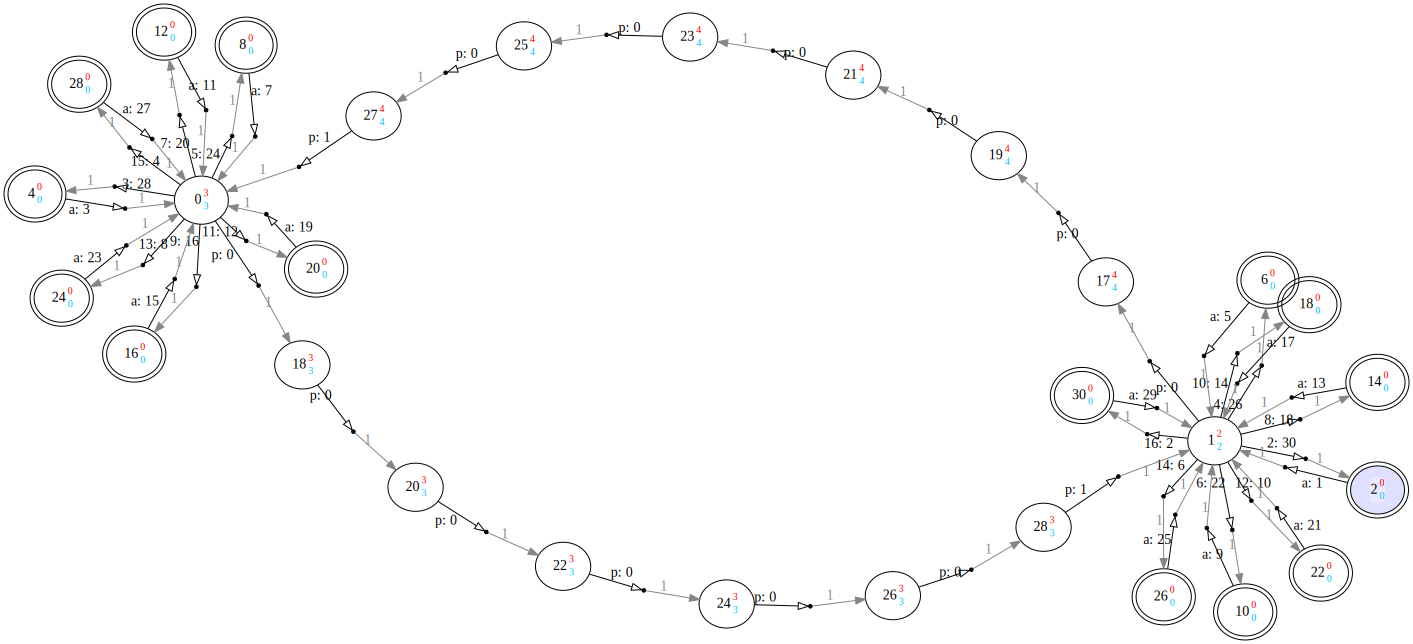

In [6]:
# Let's see the number of iterations needed
fixpoints.debug = True
print(m.get_positiveReachability(set([2]), cap+2))
m

### Visual evolution of the computation
Let's have some smaller double-flower and see the results step-by-step

it 0	:[inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]
it 1	:[4, 2, 3, 7, 7, 11, 11, 15, 15, inf, inf, inf, inf, 5, 3]
it 2	:[4, 2, 3, 7, 7, 11, 11, 15, 15, inf, inf, 5, 3, 5, 3]
it 3	:[4, 2, 3, 7, 7, 11, 11, 15, 15, 5, 3, 5, 3, 5, 3]
it 4	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 5, 3, 5, 3, 4, 3]
it 5	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 5, 3, 4, 3, 4, 3]
it 6	:[3, 2, 3, 6, 7, 10, 11, 14, 15, 4, 3, 4, 3, 4, 3]


'Iteration 0:'

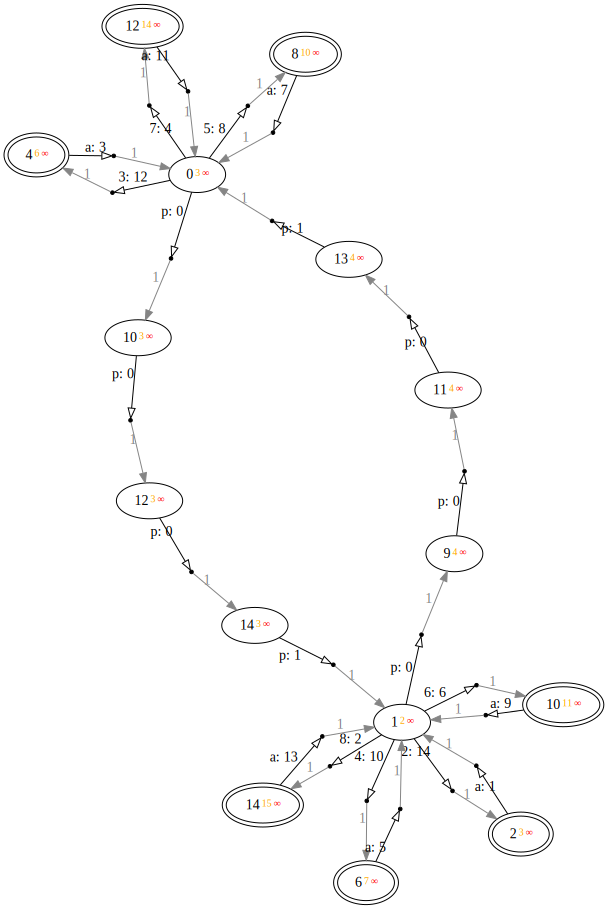

'Iteration 1:'

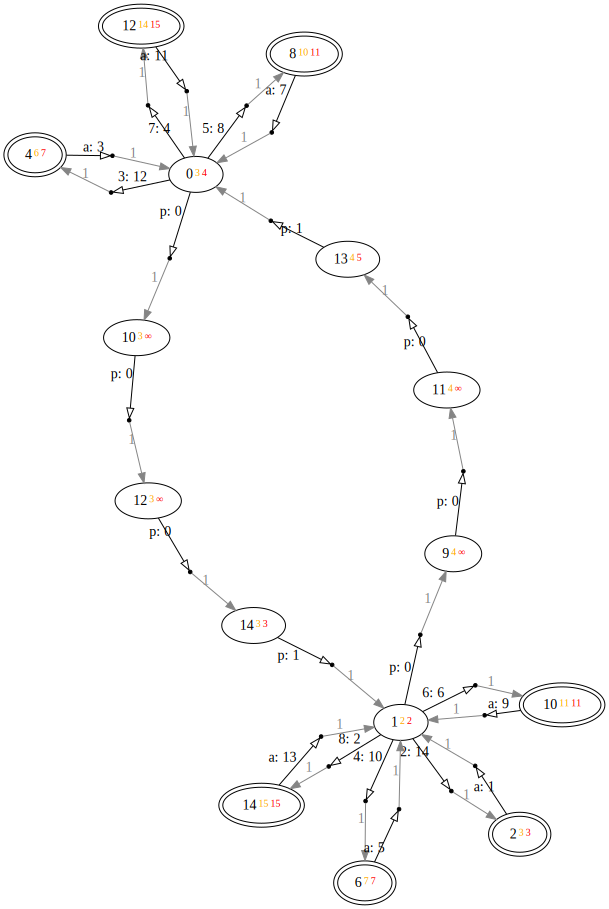

'Iteration 2:'

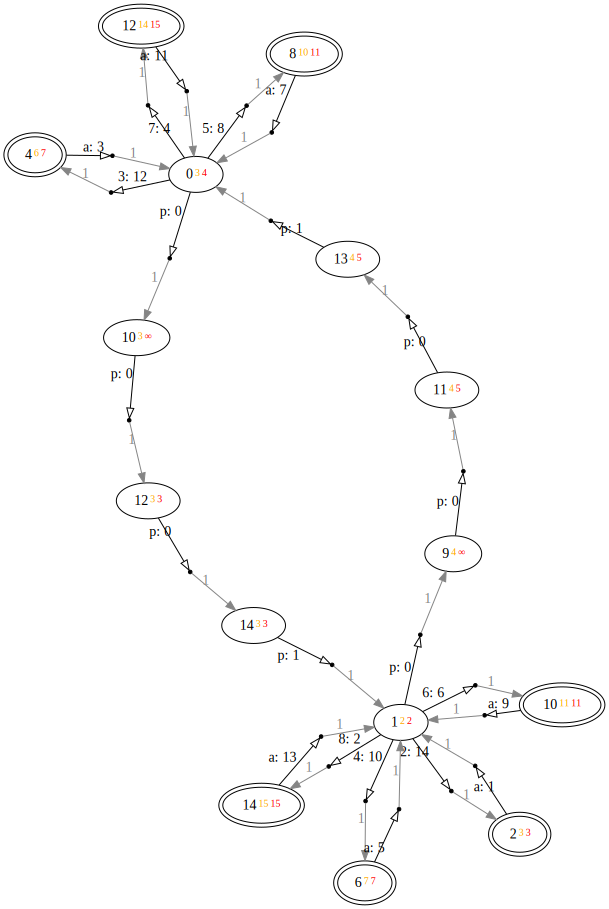

'Iteration 3:'

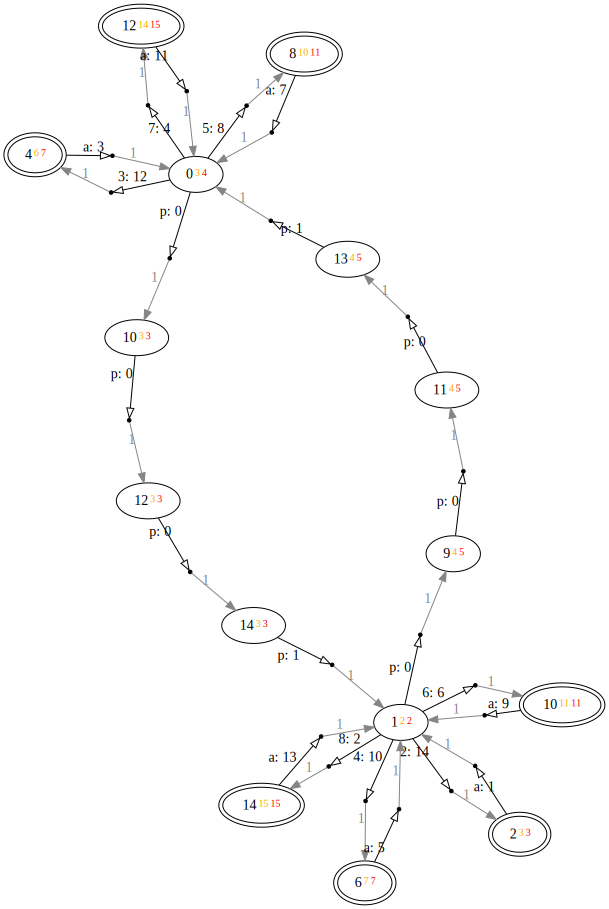

'Iteration 4:'

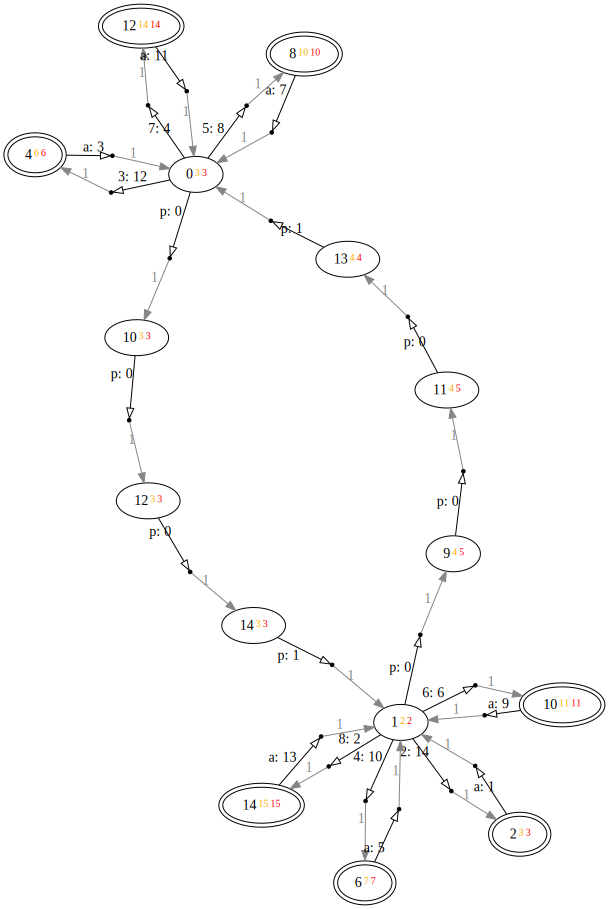

'Iteration 5:'

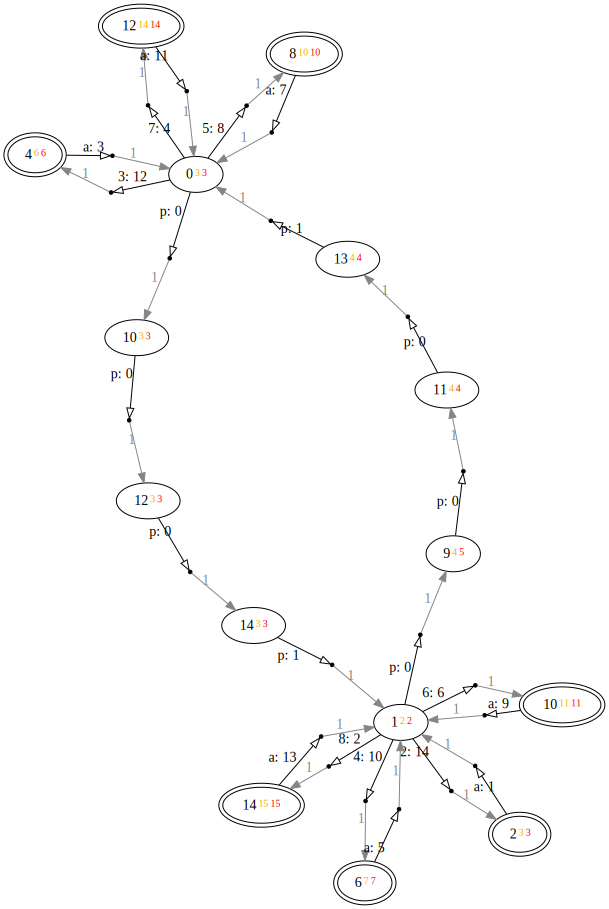

'Iteration 6:'

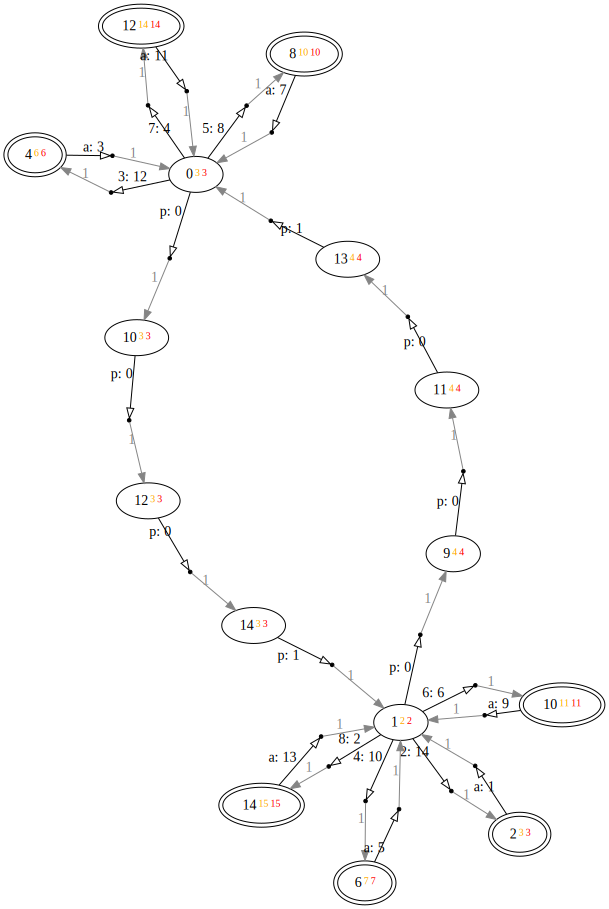

[3, 2, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3]

In [8]:
cap = 16 # We have cap/2 reload states, cap/4 in each flower
path = 3
m = consMDP_double_flower(cap, path)

el = energy_solver.EnergySolver(m, cap+2, set([2]))
m.energy_levels = el # For visualization
m.get_minInitCons()

# First compute Safe reloads without visualization
fixpoints.debug=False
fixpoints.debug_vis=True
dot.default_options="ms"
el.get_safe()

'Iteration 0:'

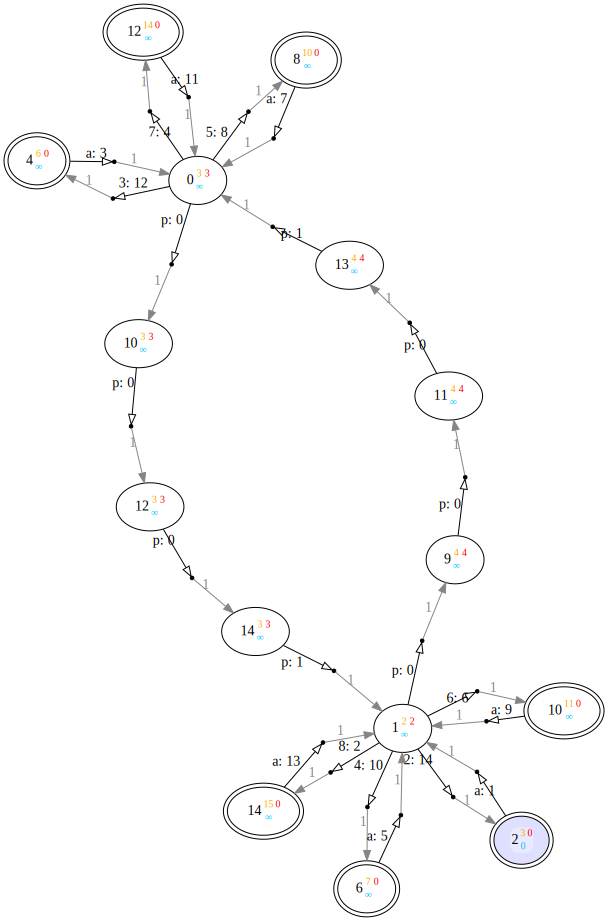

'Iteration 1:'

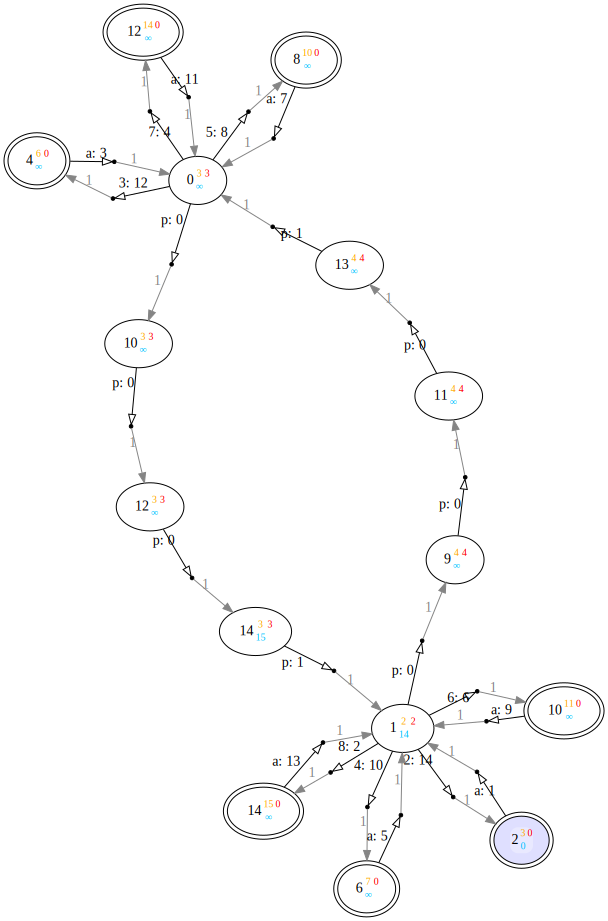

'Iteration 2:'

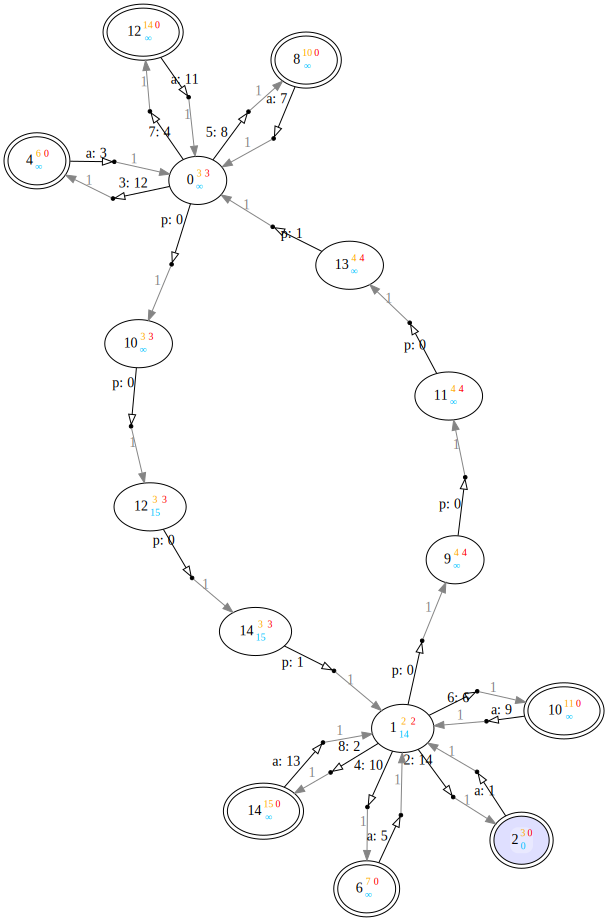

'Iteration 3:'

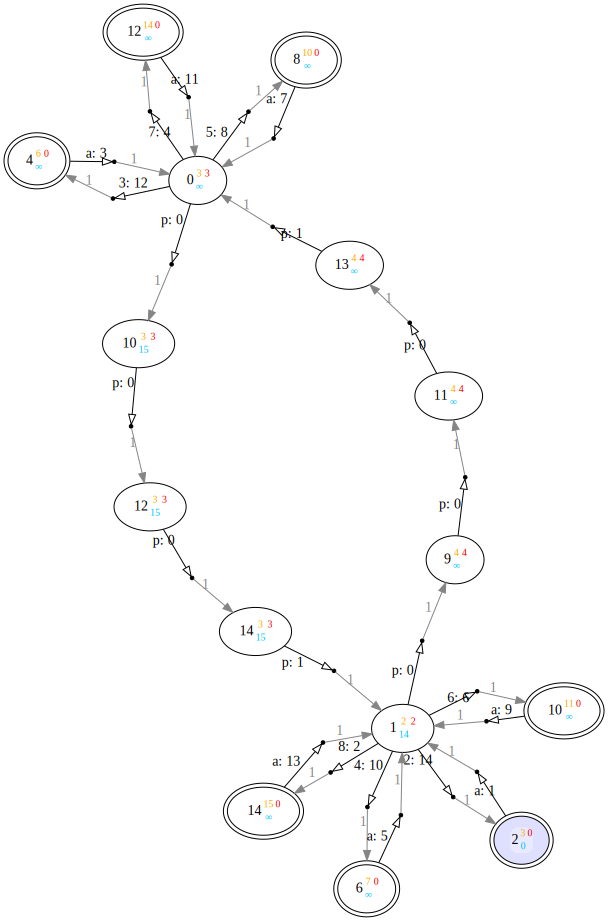

'Iteration 4:'

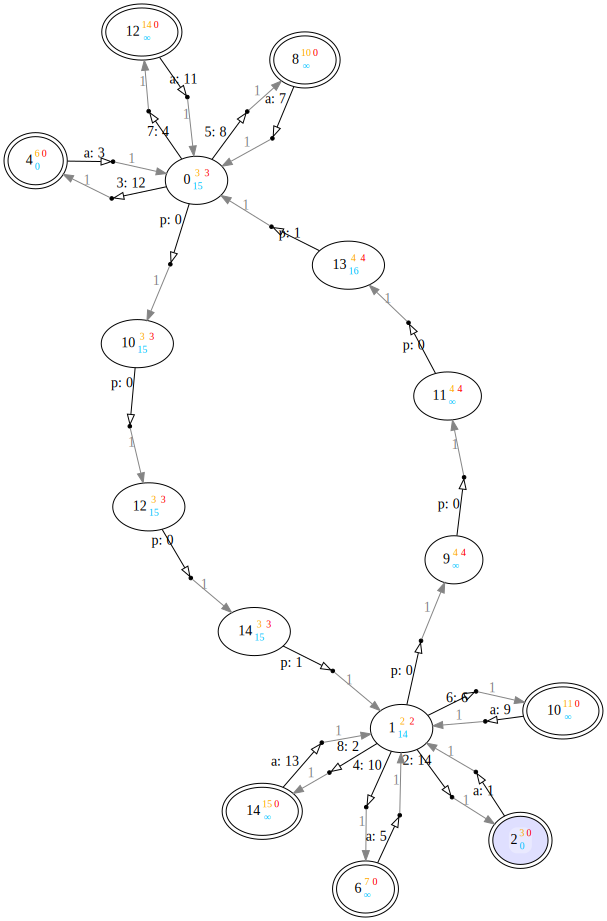

'Iteration 5:'

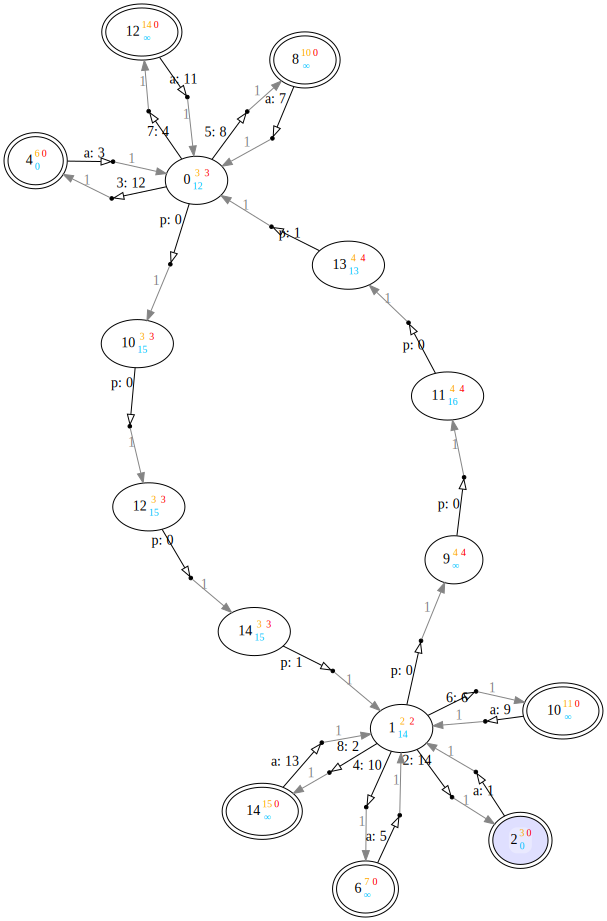

'Iteration 6:'

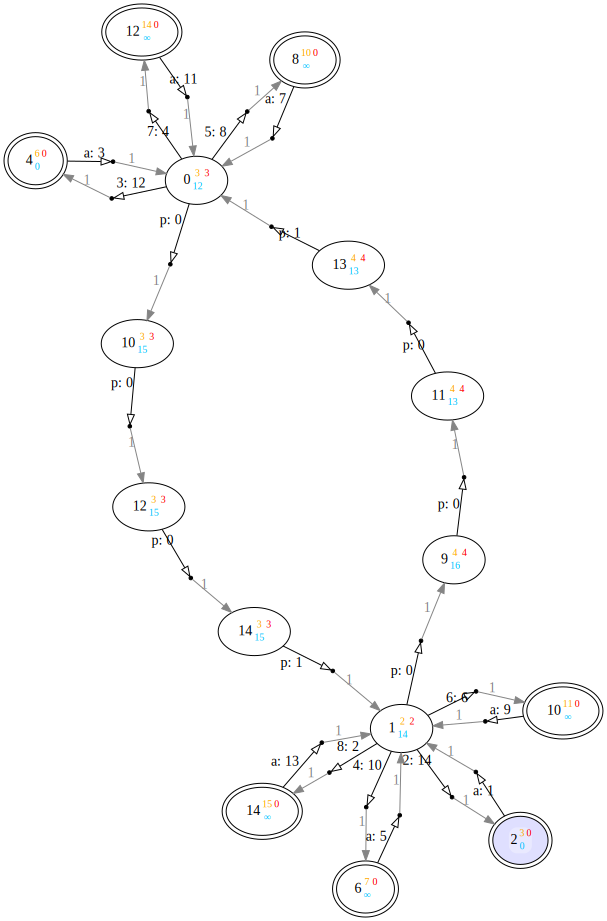

'Iteration 7:'

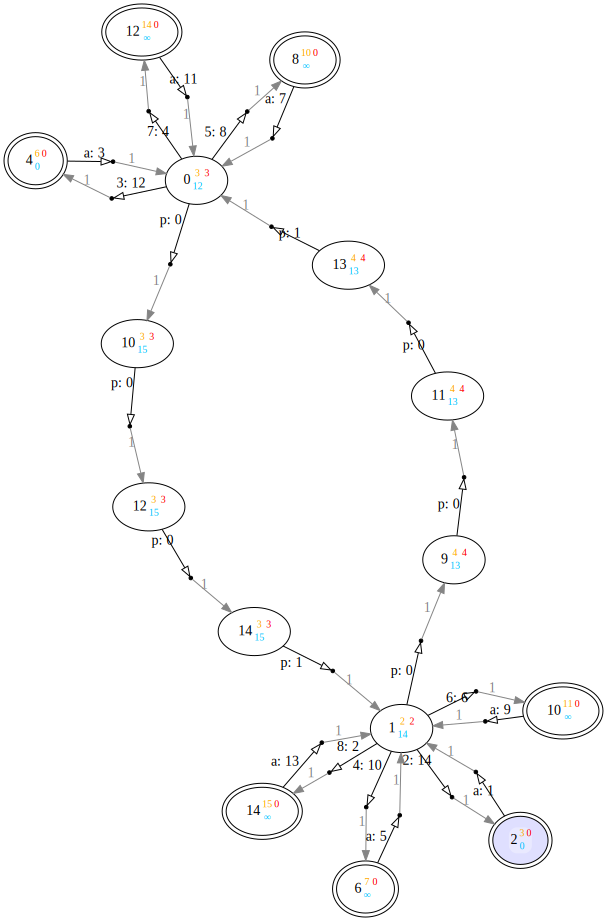

'Iteration 8:'

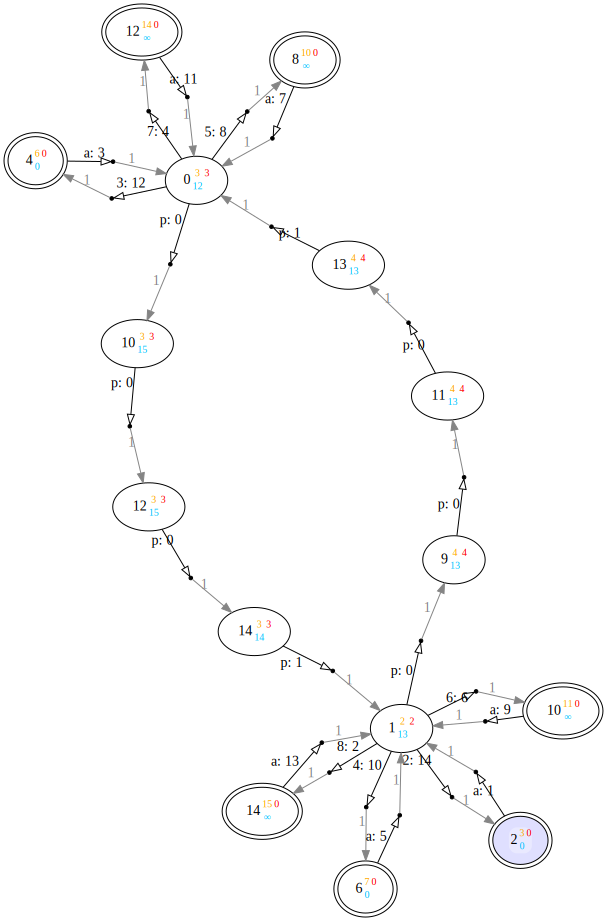

'Iteration 9:'

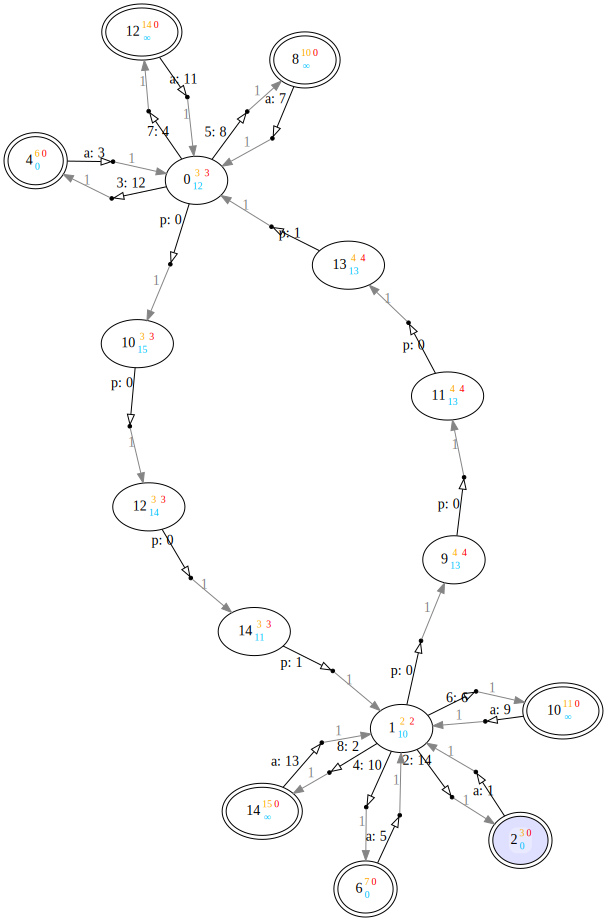

'Iteration 10:'

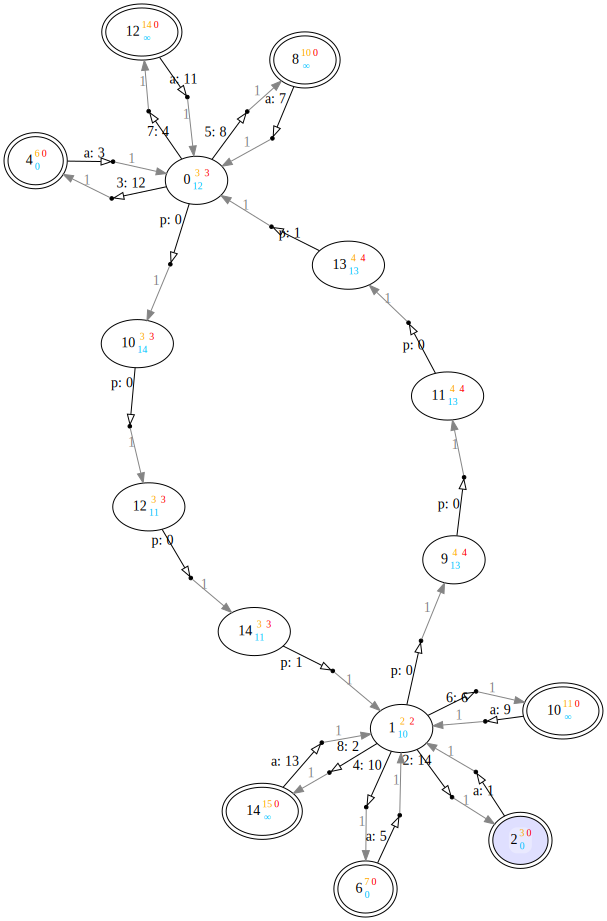

'Iteration 11:'

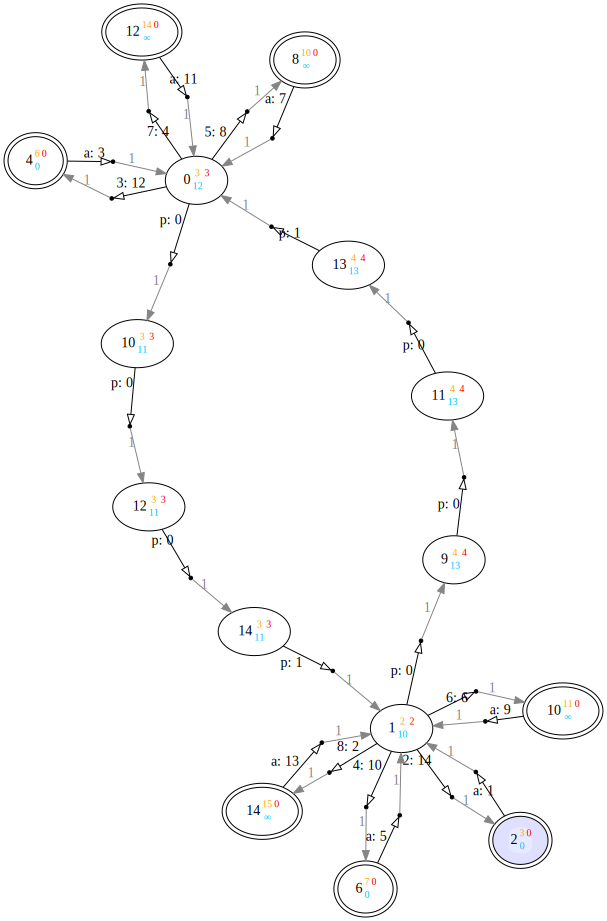

'Iteration 12:'

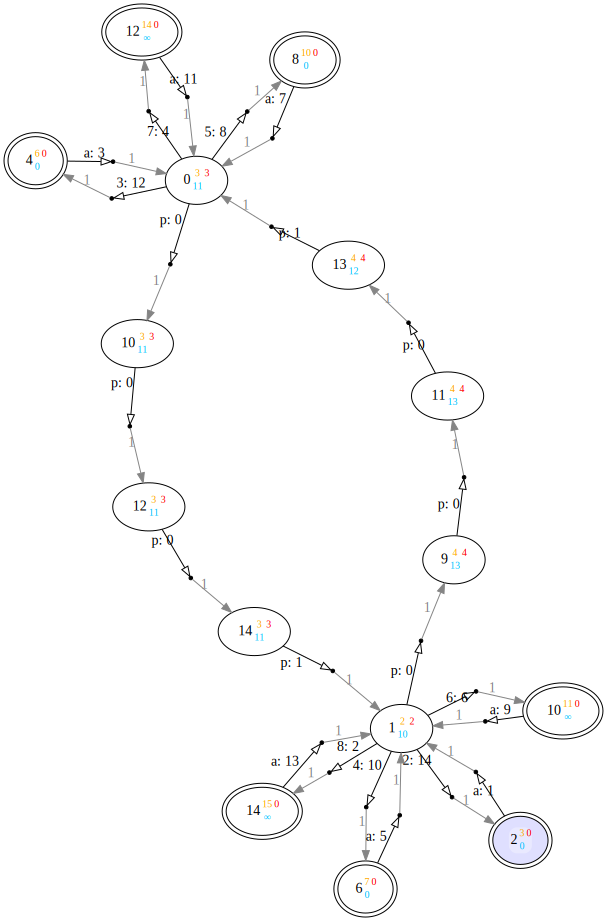

'Iteration 13:'

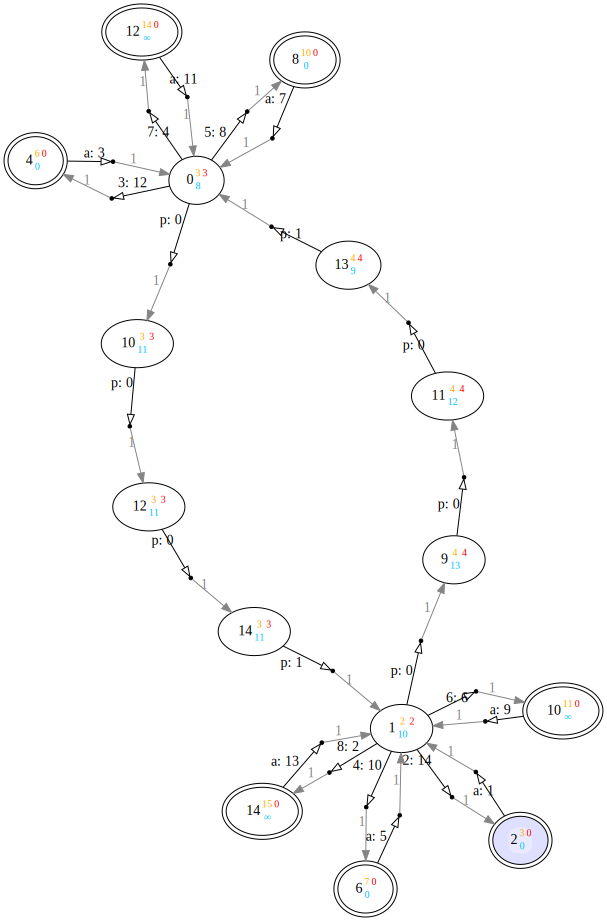

'Iteration 14:'

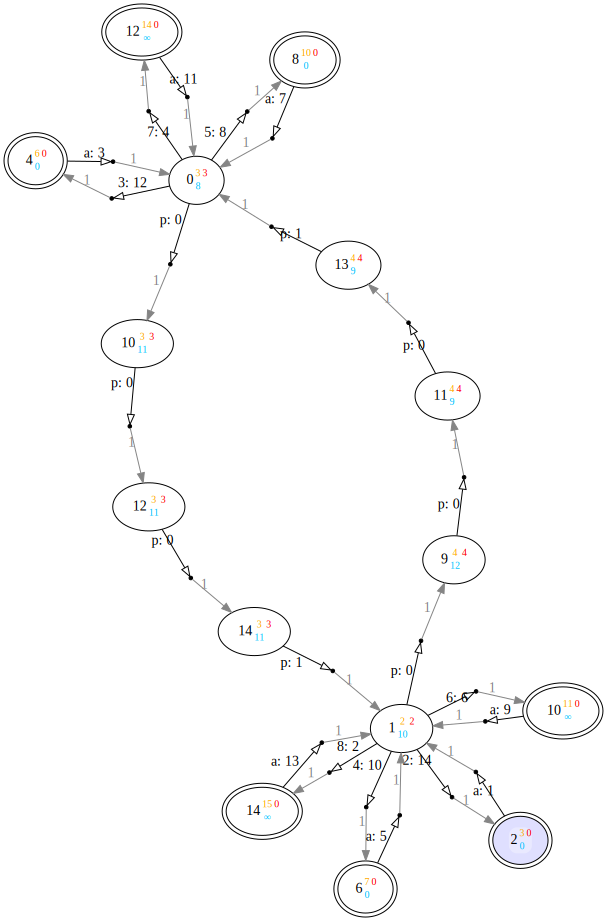

'Iteration 15:'

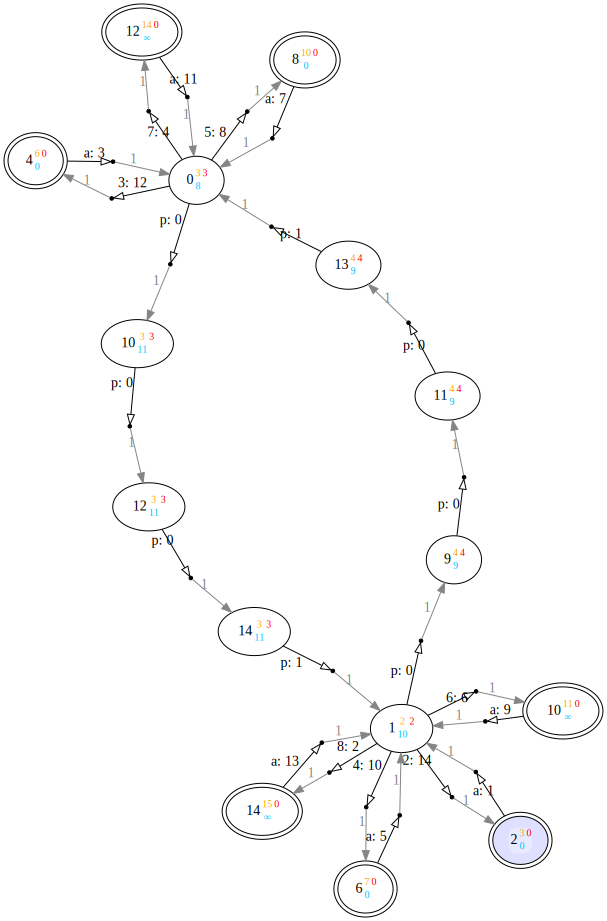

'Iteration 16:'

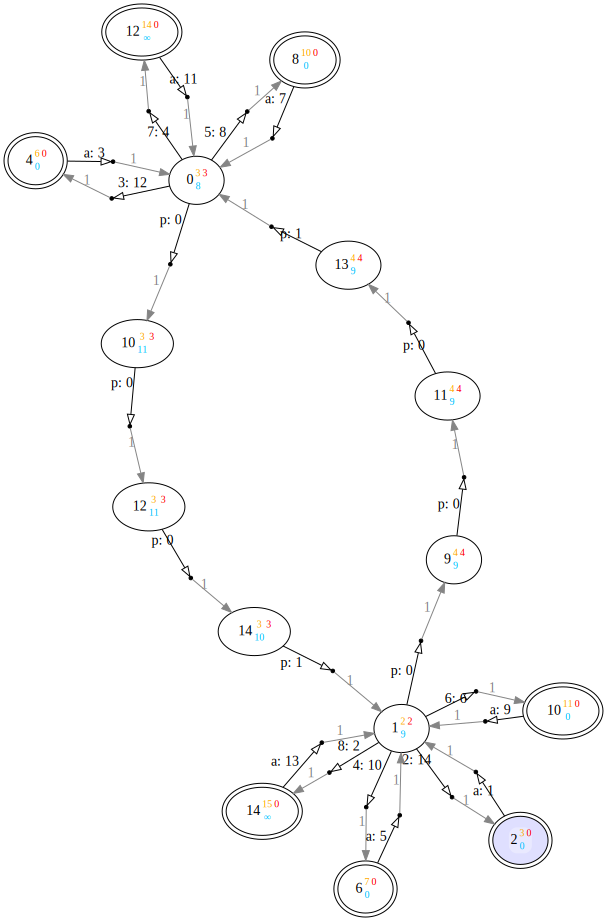

'Iteration 17:'

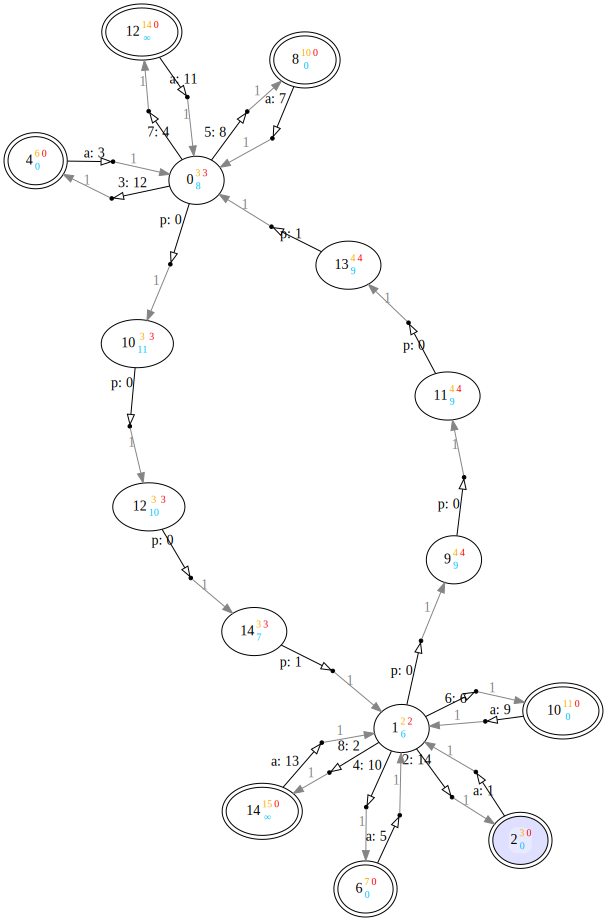

'Iteration 18:'

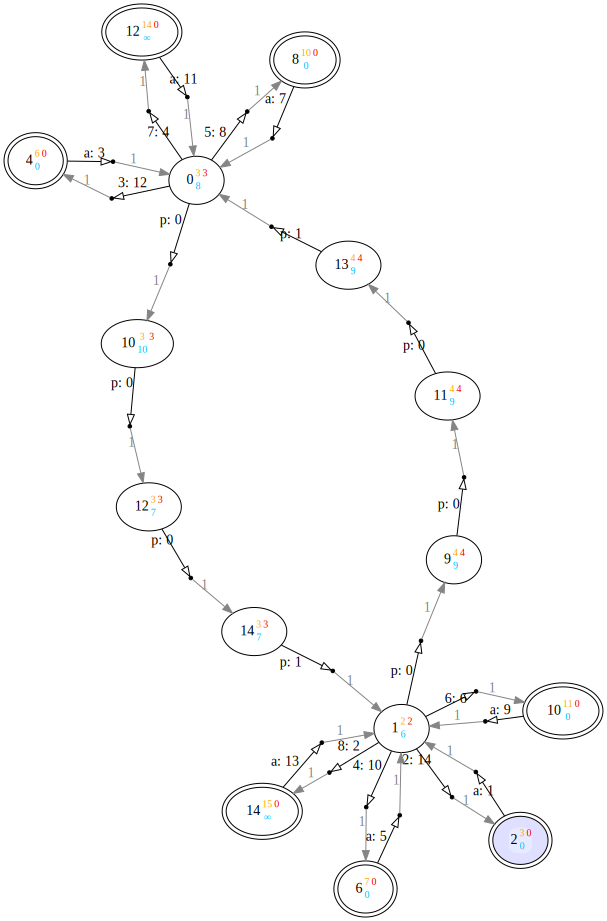

'Iteration 19:'

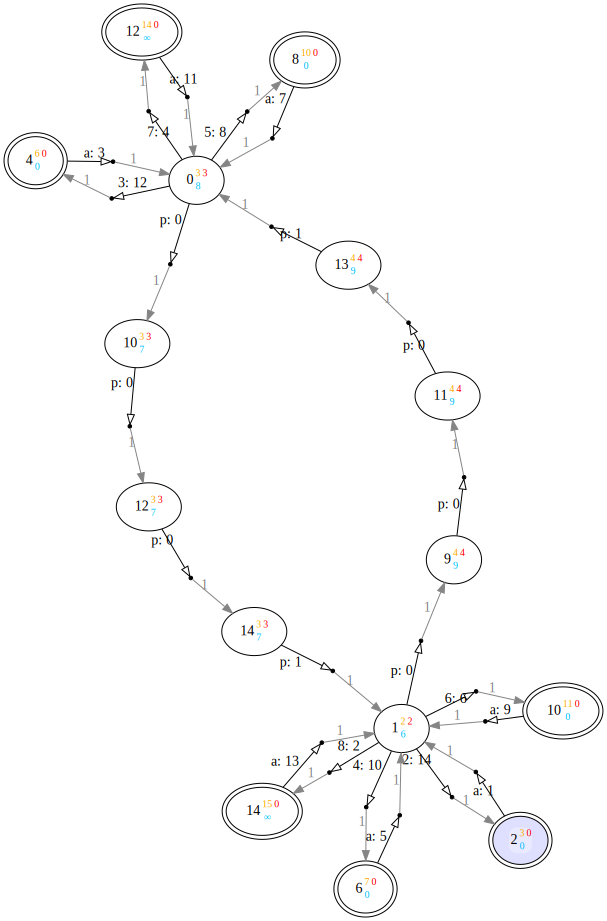

'Iteration 20:'

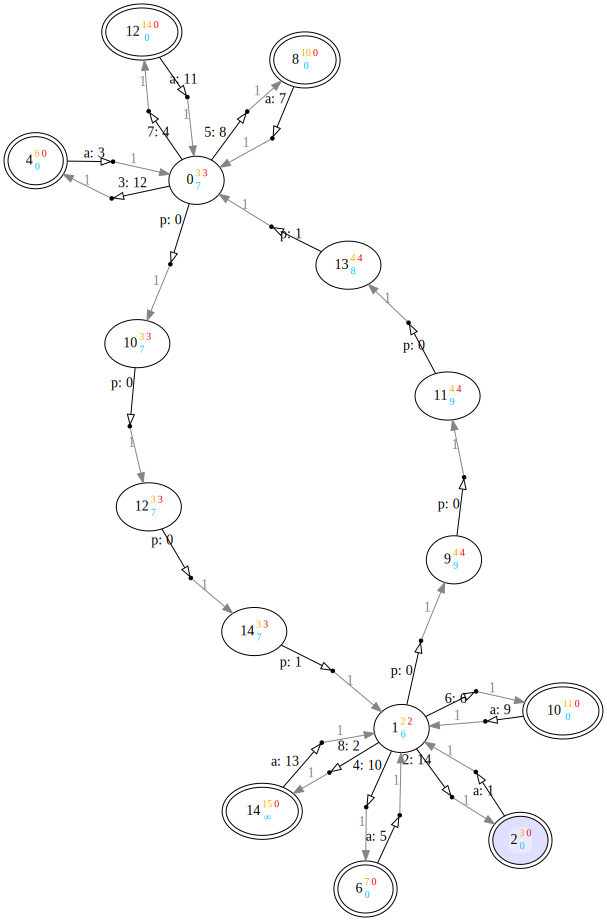

'Iteration 21:'

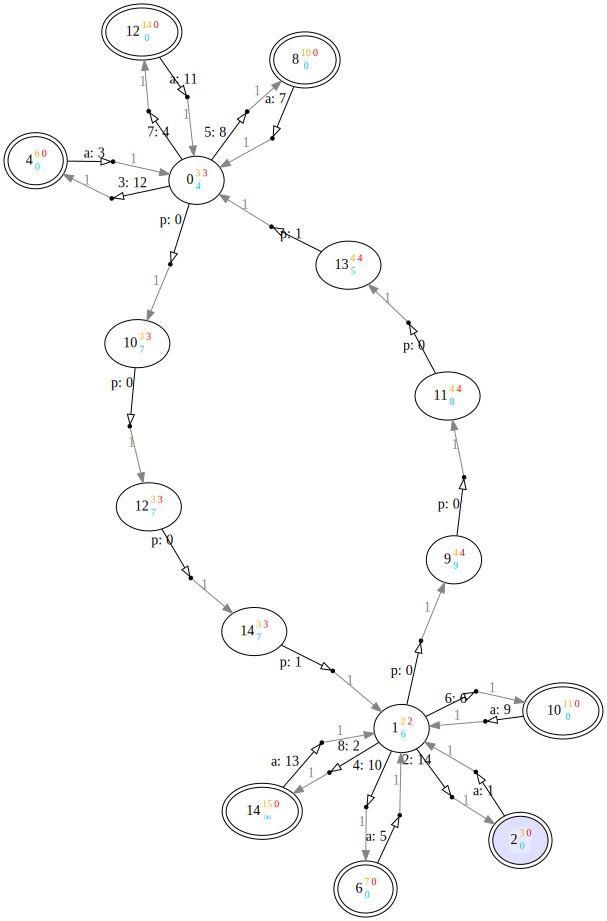

'Iteration 22:'

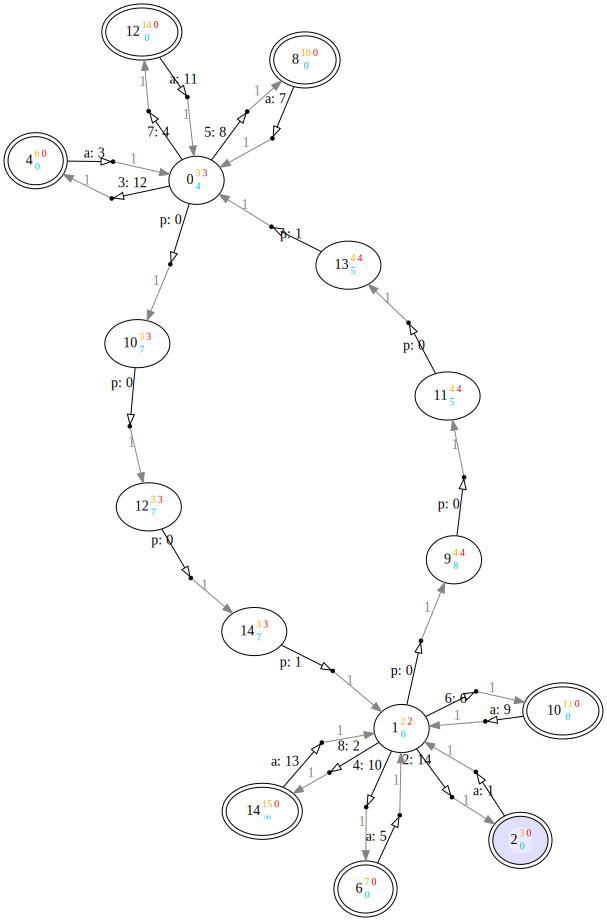

'Iteration 23:'

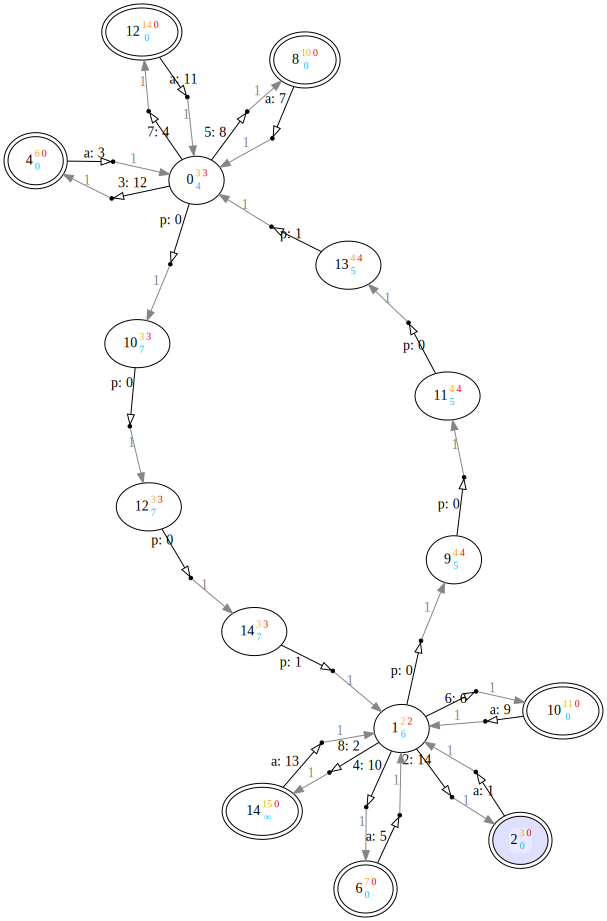

'Iteration 24:'

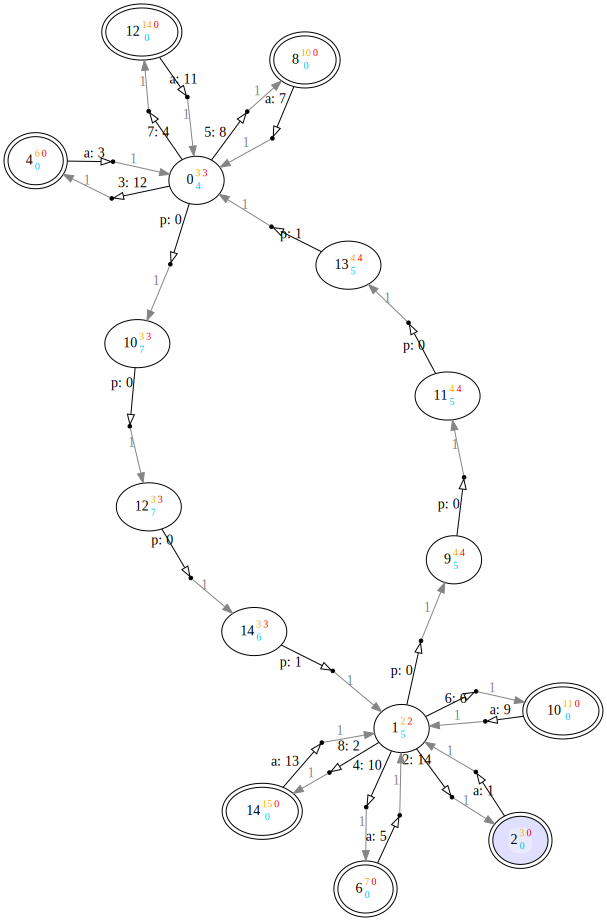

'Iteration 25:'

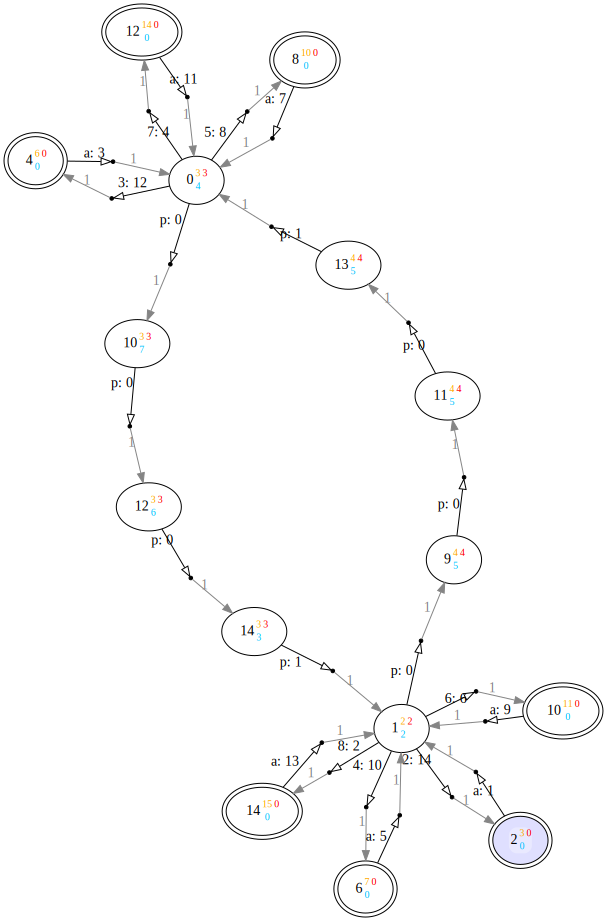

'Iteration 26:'

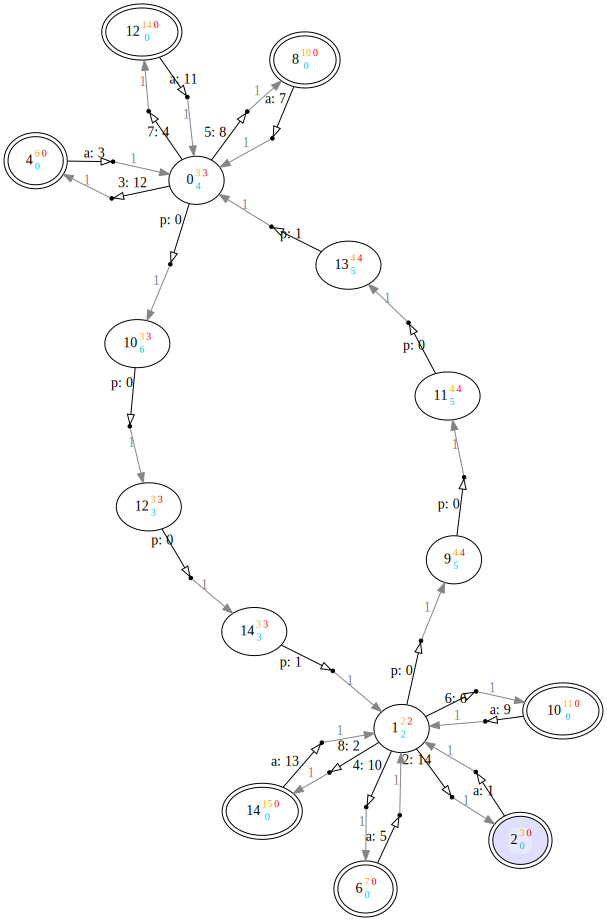

'Iteration 27:'

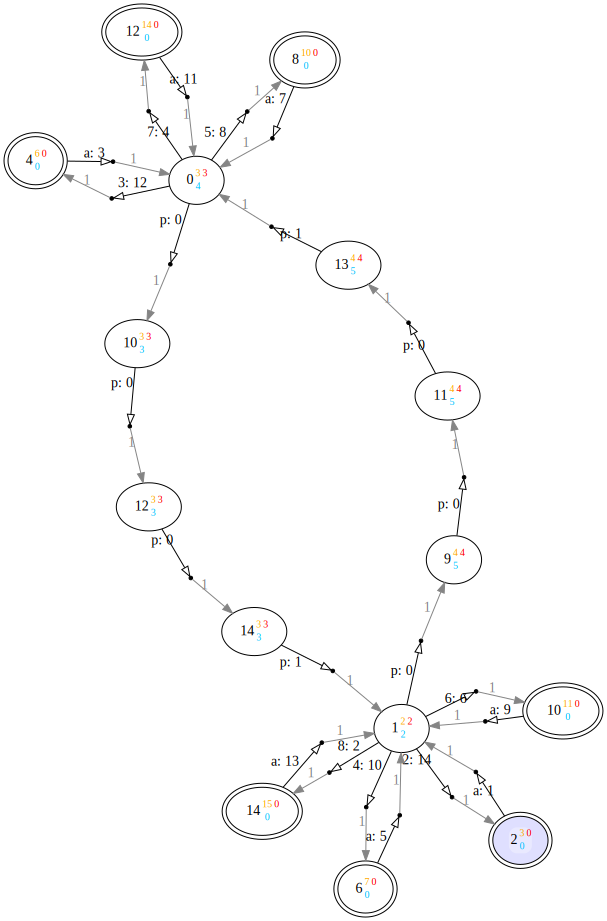

'Iteration 28:'

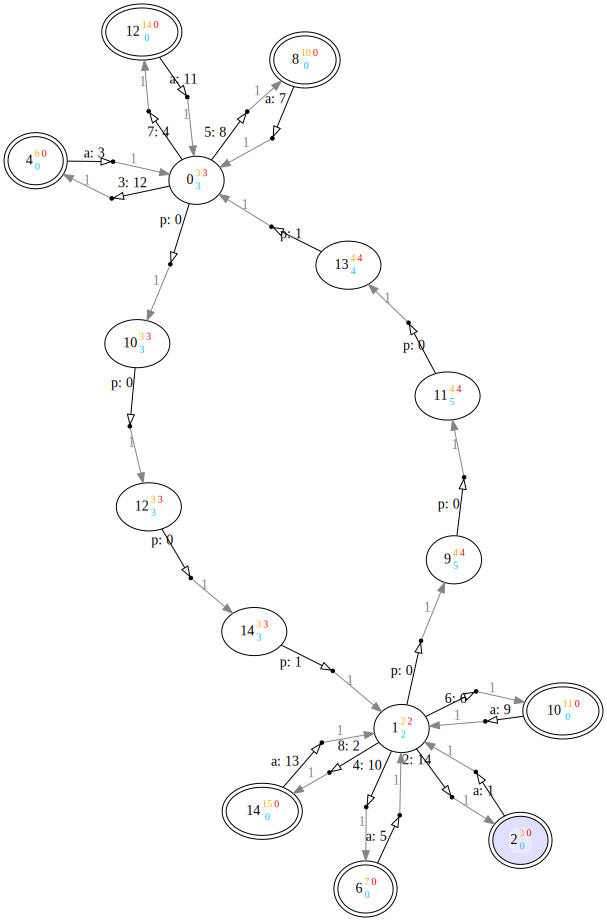

'Iteration 29:'

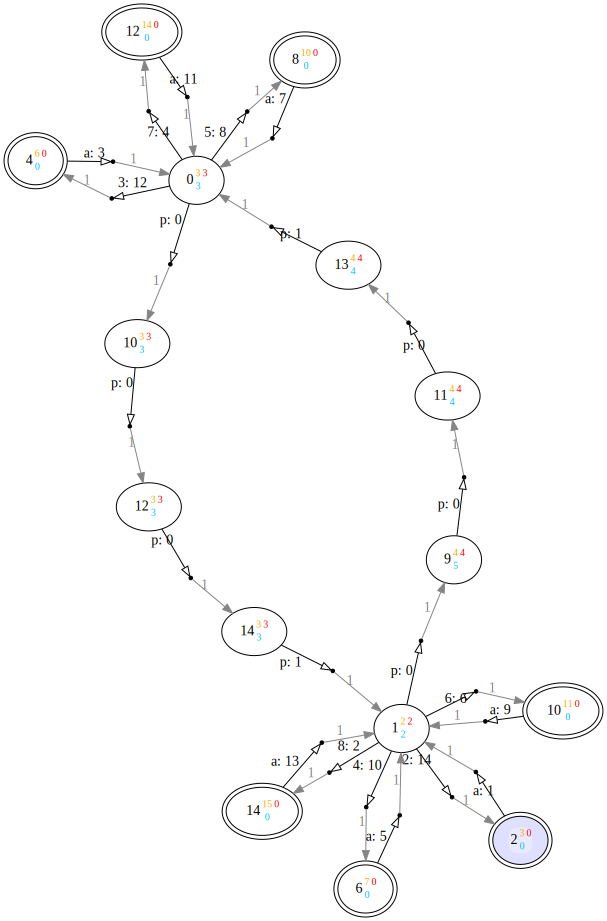

'Iteration 30:'

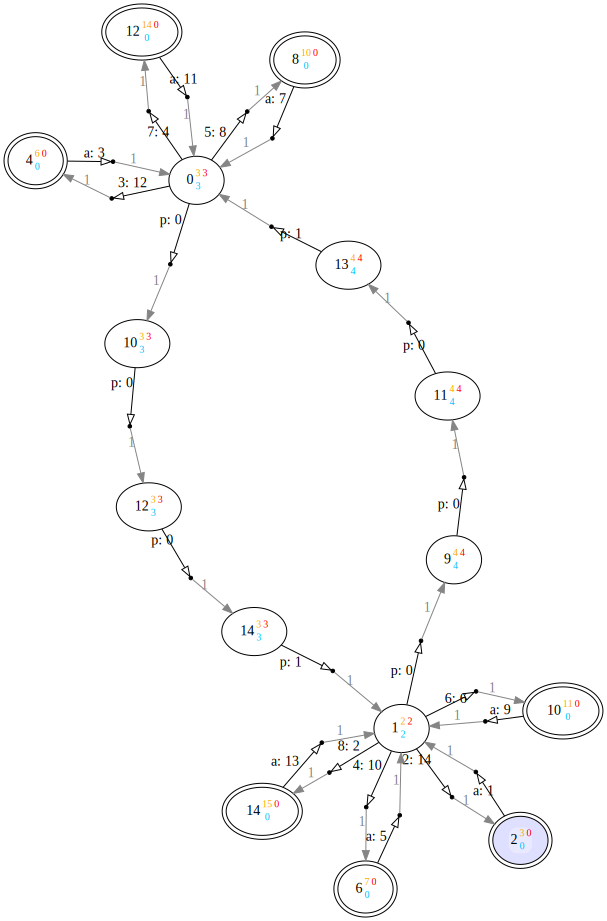

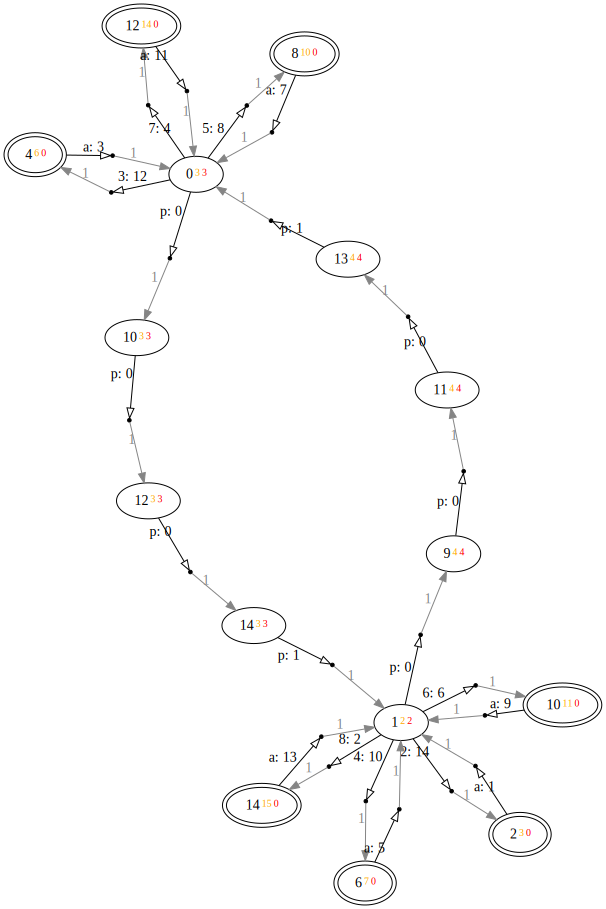

In [9]:
# safety.debug_vis=True
fixpoints.debug_vis=True
el.get_positiveReachability()
m

'Iteration 0:'

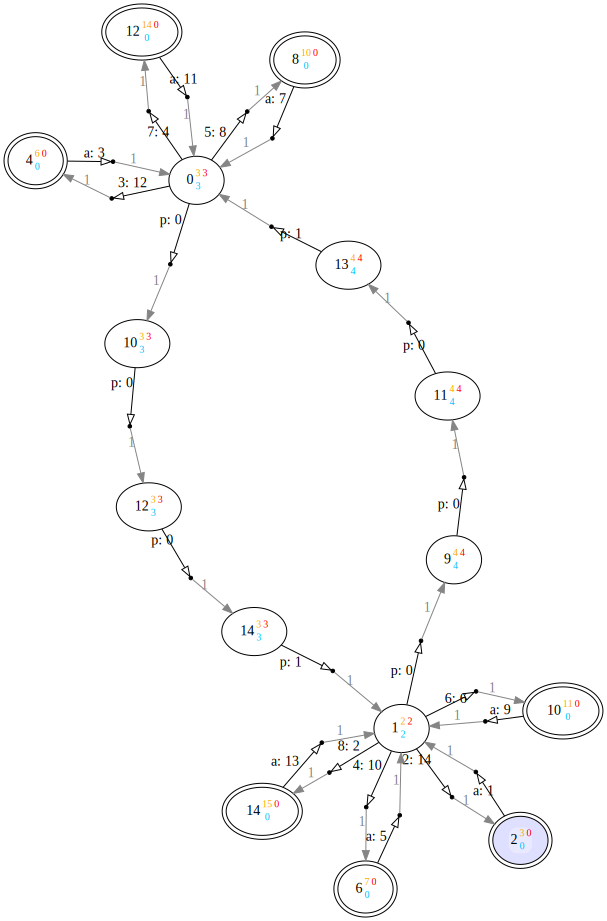

'Iteration 1:'

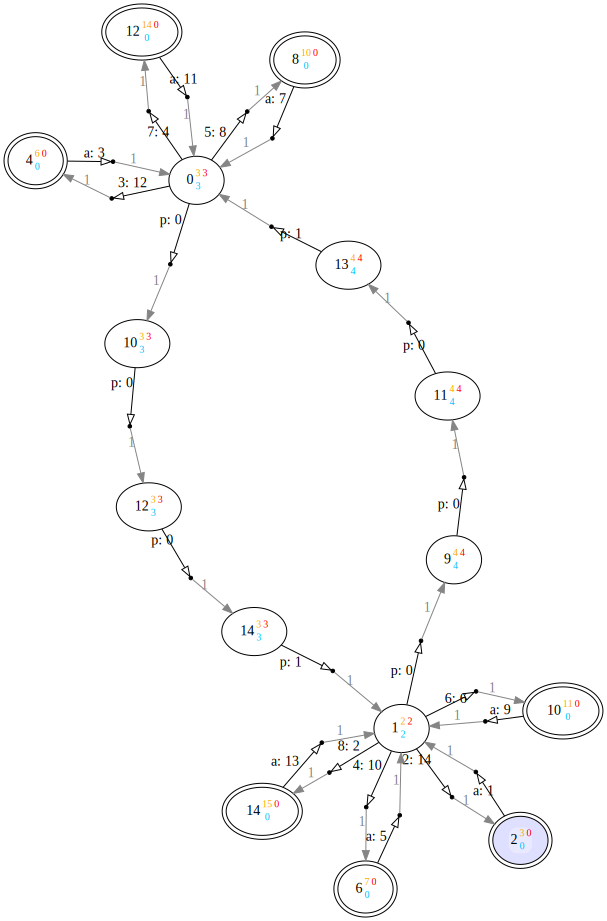

'Iteration 2:'

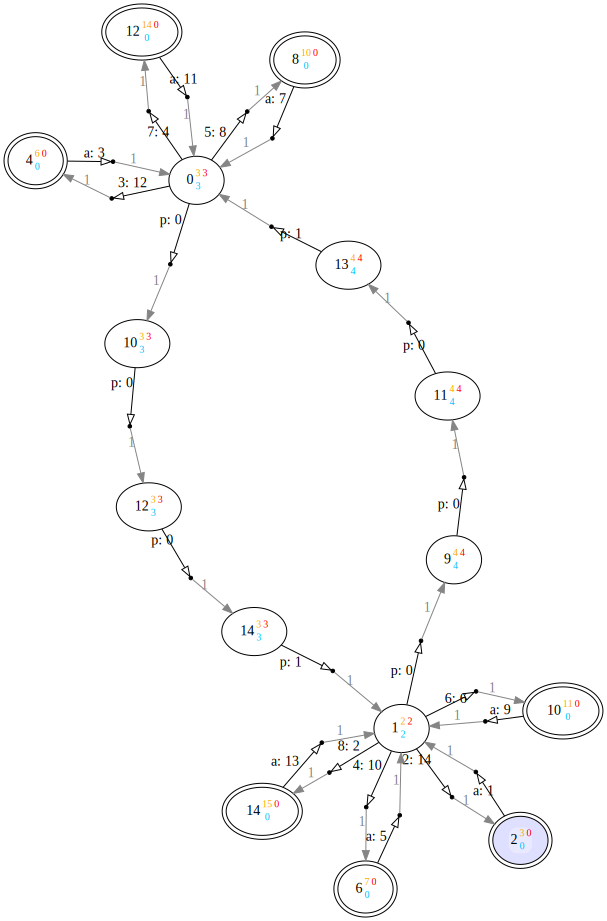

'Iteration 3:'

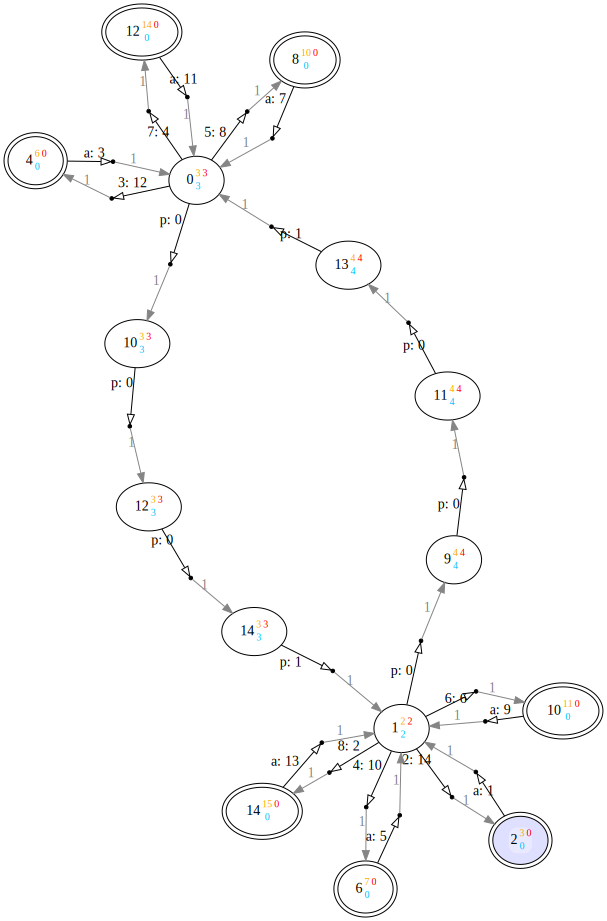

'Iteration 4:'

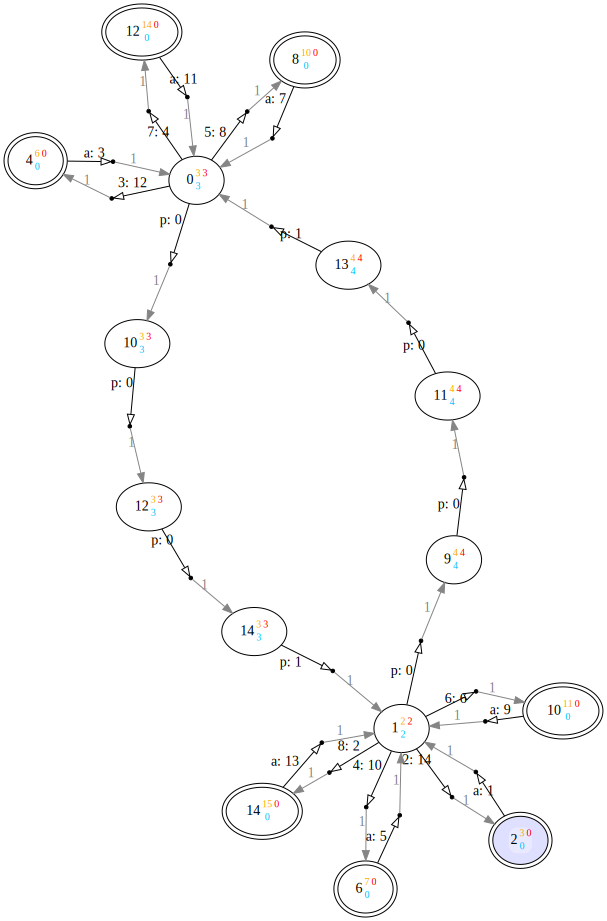

'Iteration 5:'

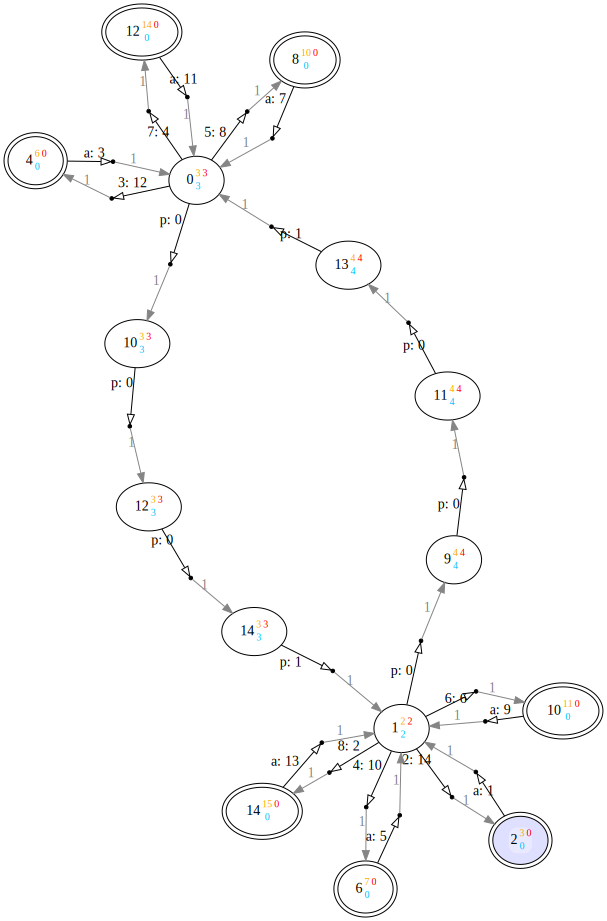

'Iteration 6:'

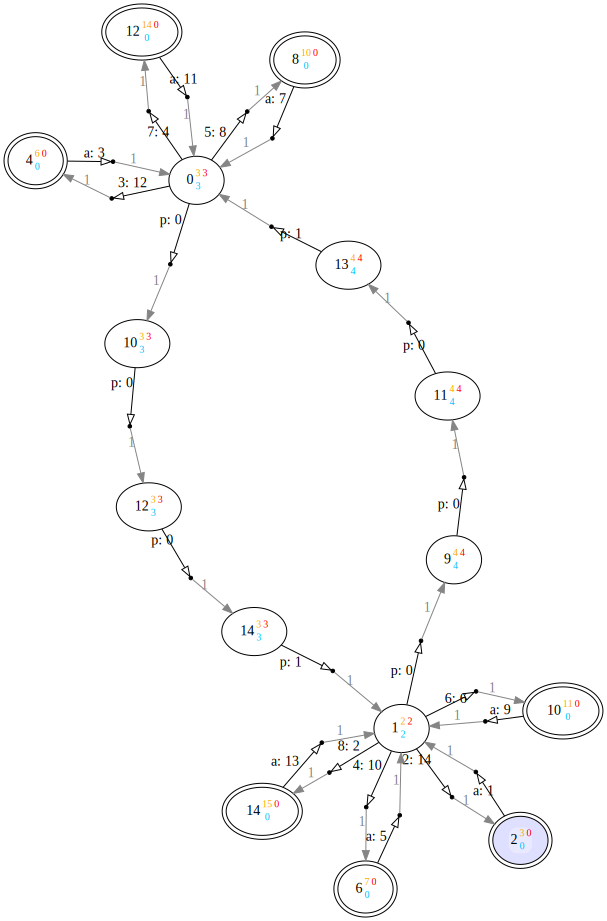

'Iteration 0:'

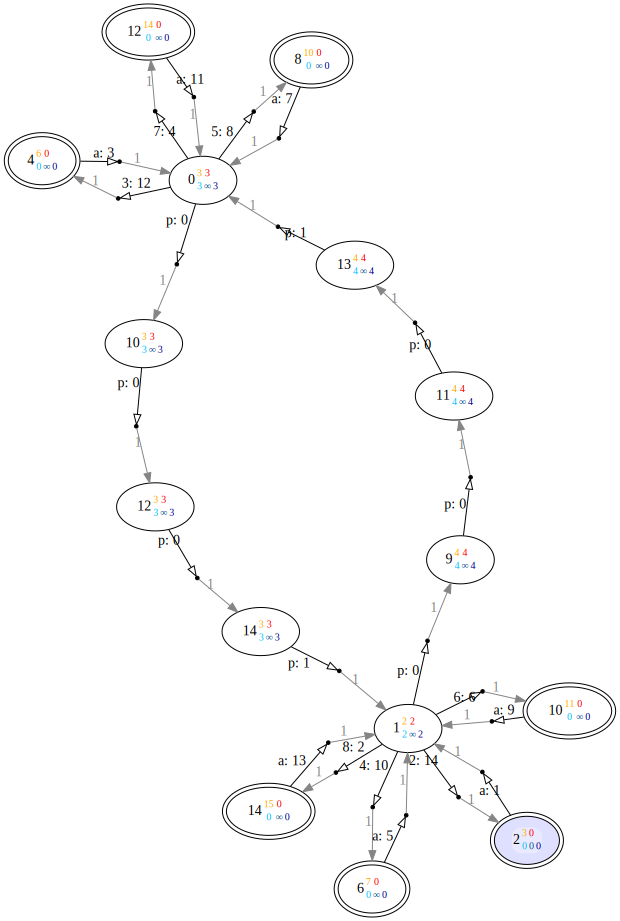

'Iteration 1:'

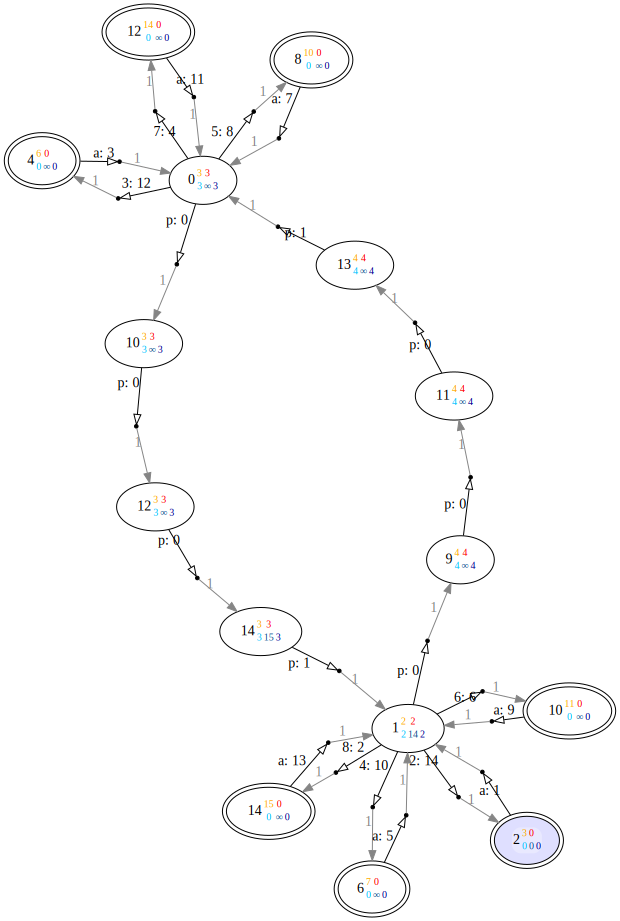

'Iteration 2:'

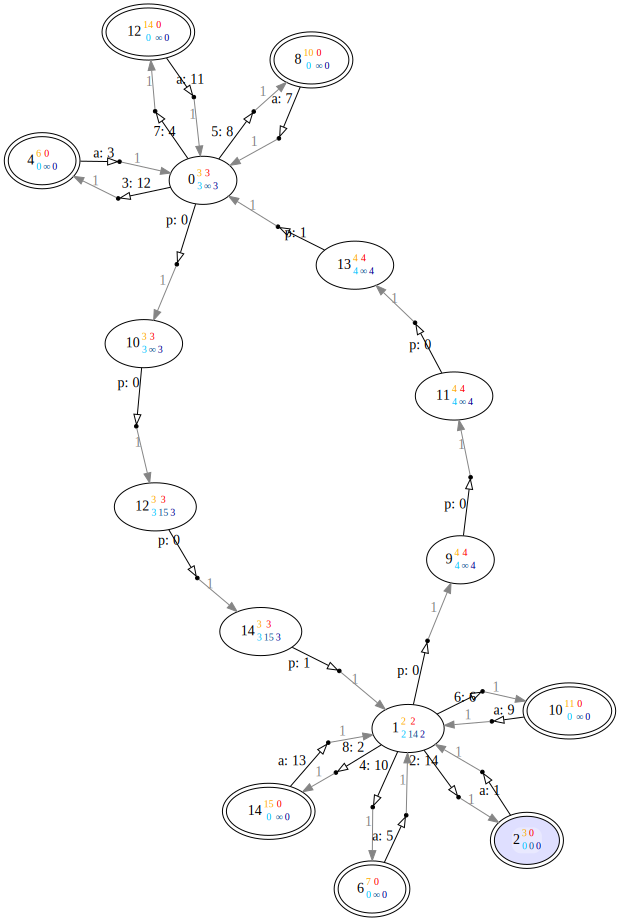

'Iteration 3:'

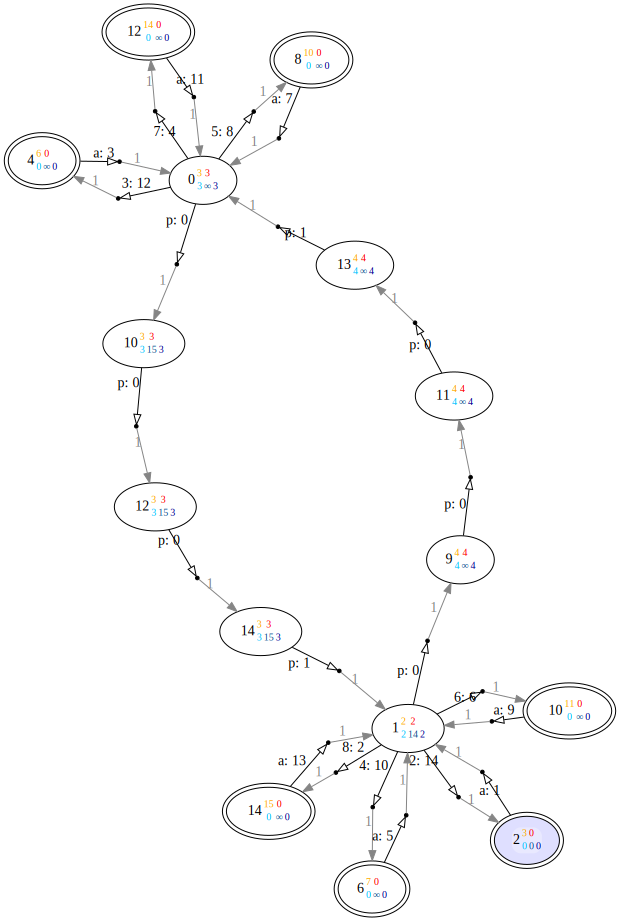

'Iteration 4:'

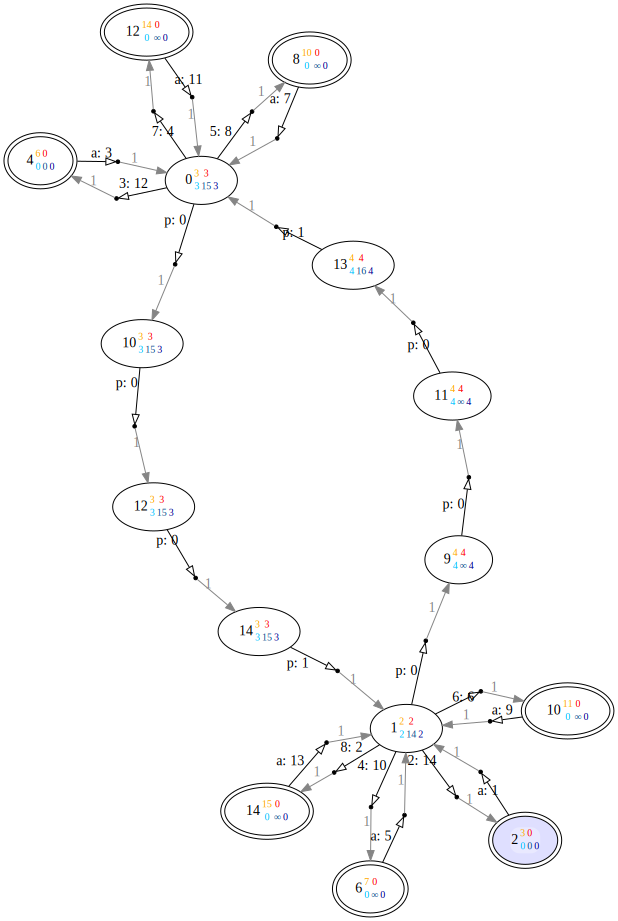

'Iteration 5:'

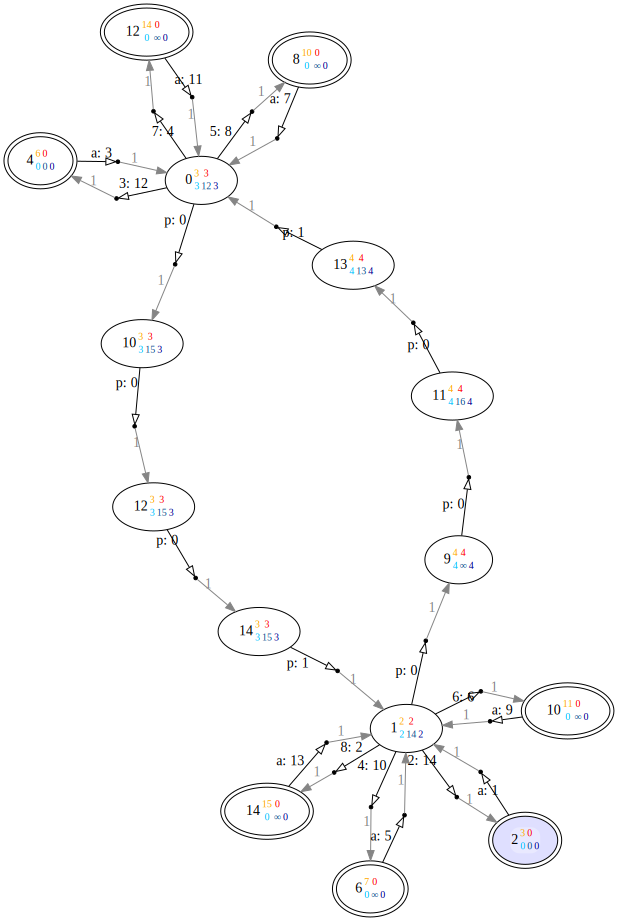

'Iteration 6:'

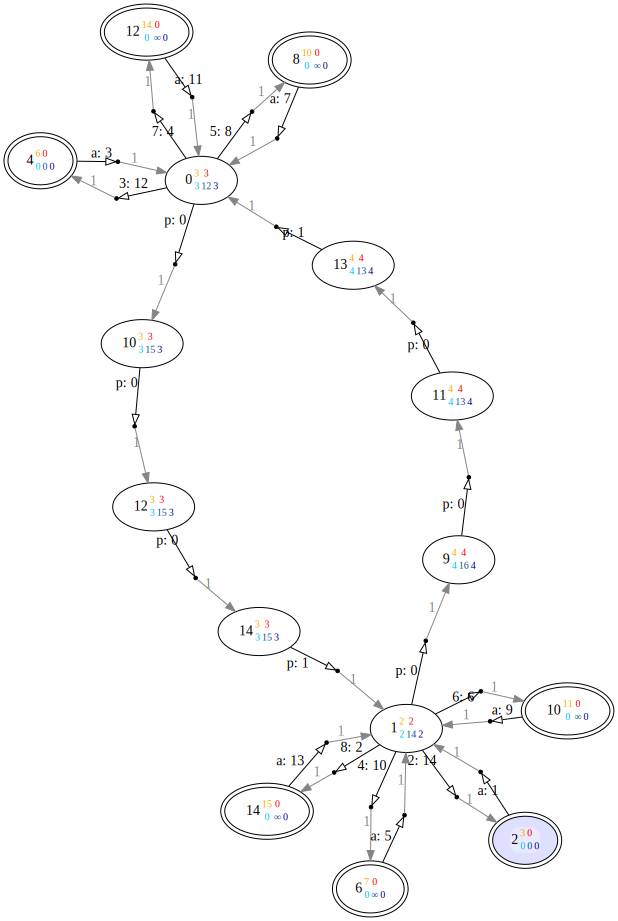

'Iteration 7:'

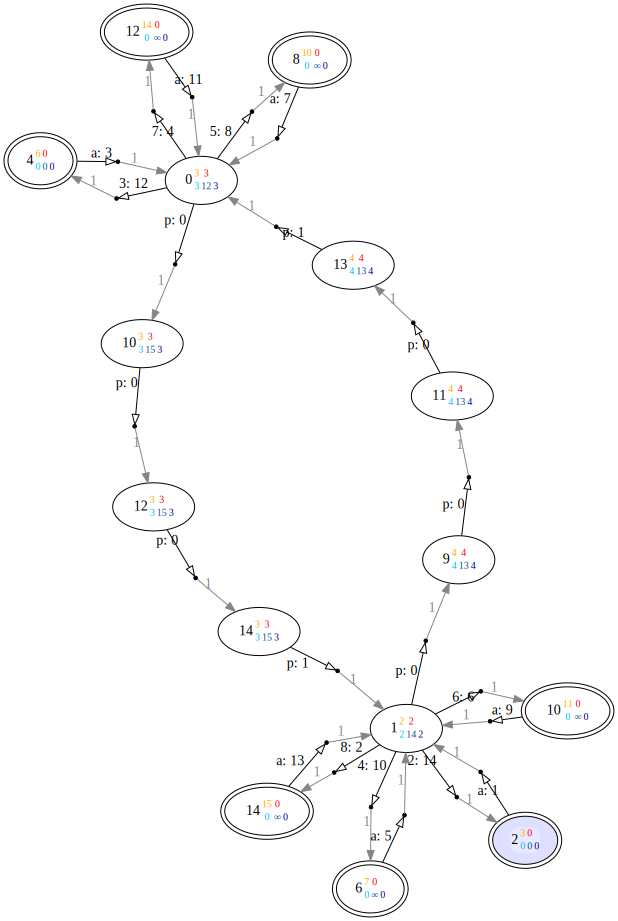

'Iteration 8:'

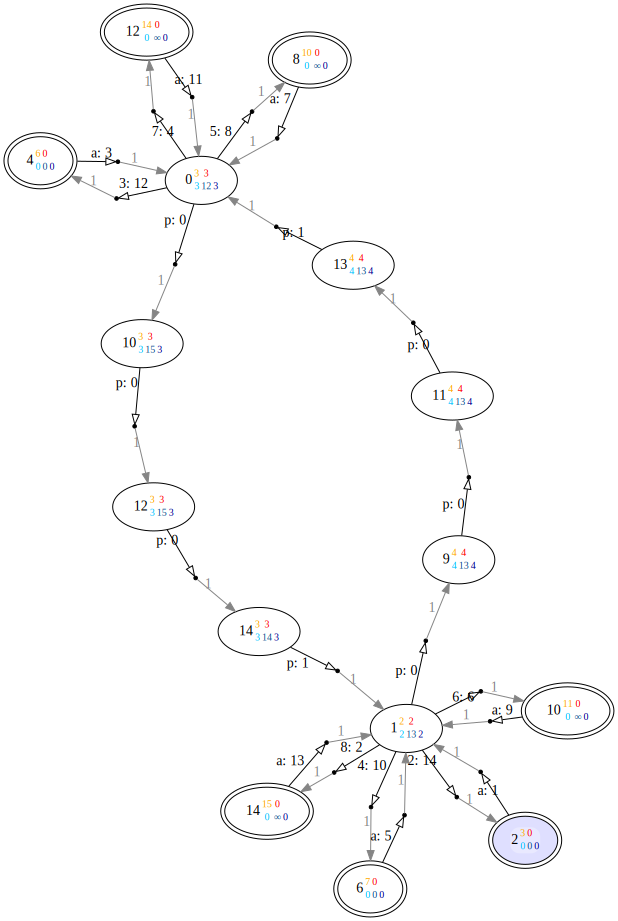

'Iteration 9:'

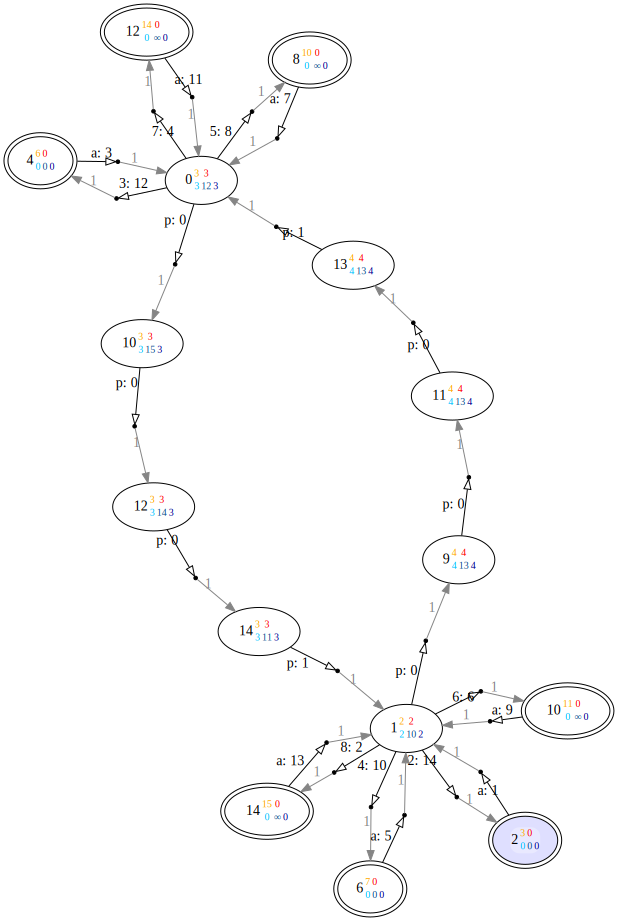

'Iteration 10:'

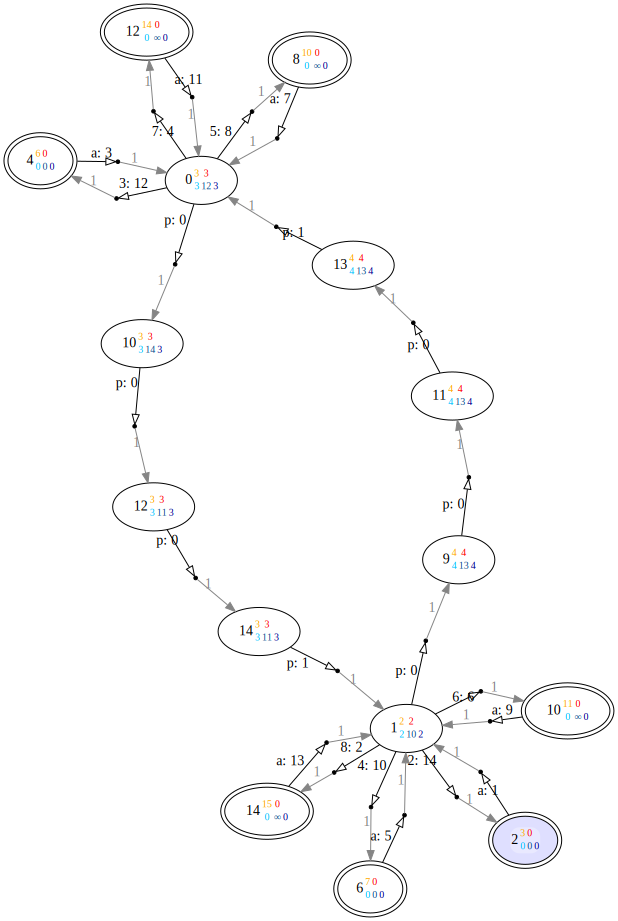

'Iteration 11:'

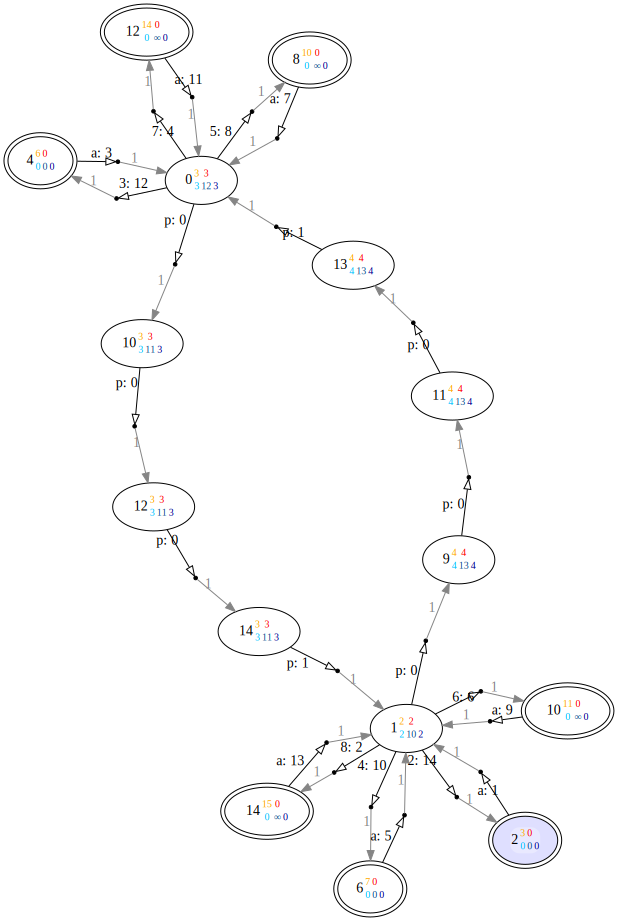

'Iteration 12:'

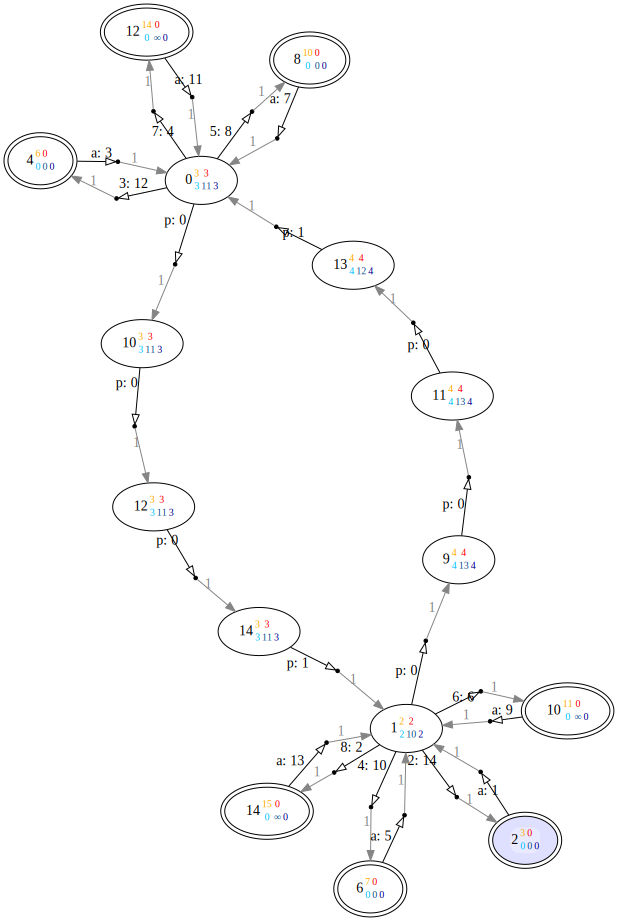

'Iteration 13:'

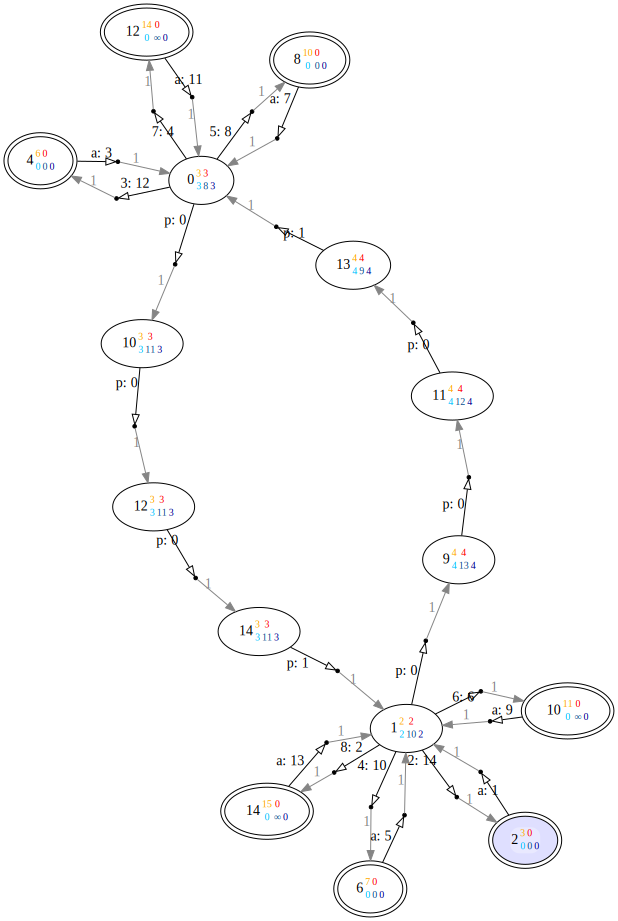

'Iteration 14:'

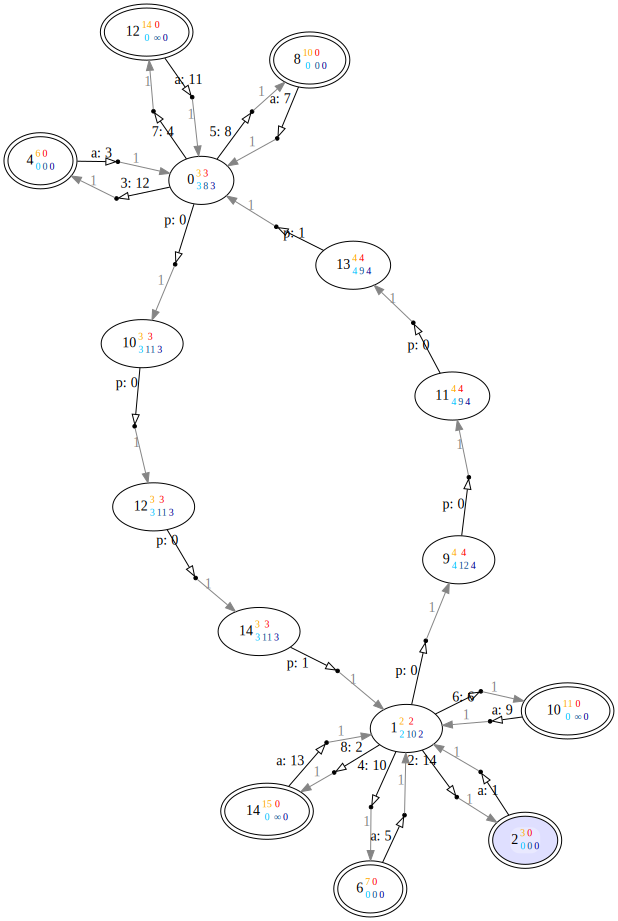

'Iteration 15:'

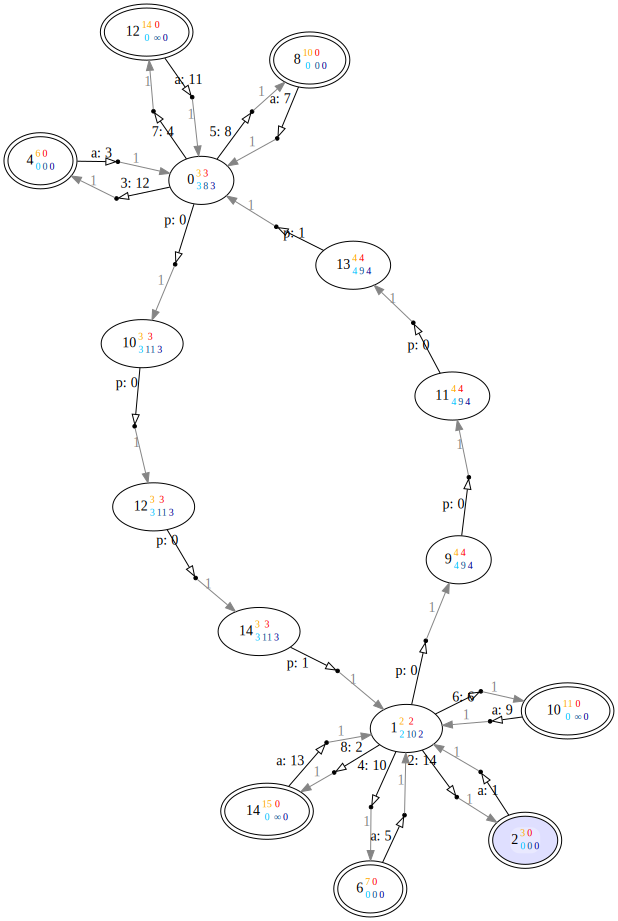

'Iteration 16:'

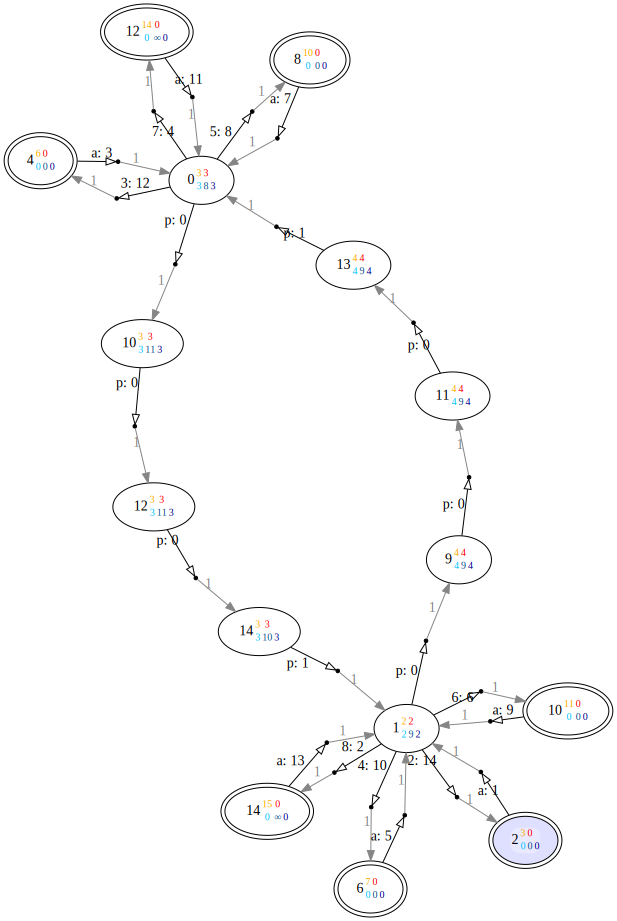

'Iteration 17:'

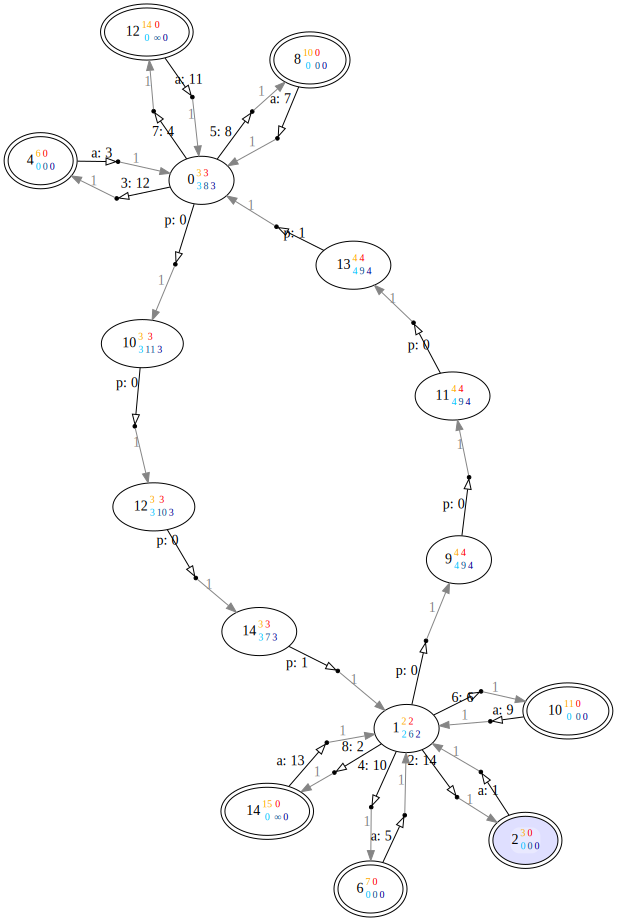

'Iteration 18:'

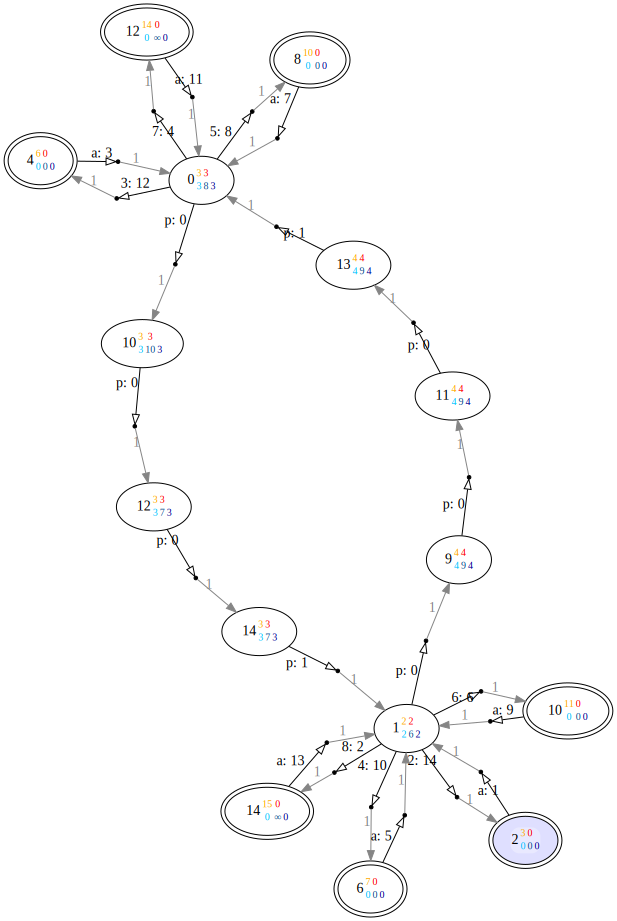

'Iteration 19:'

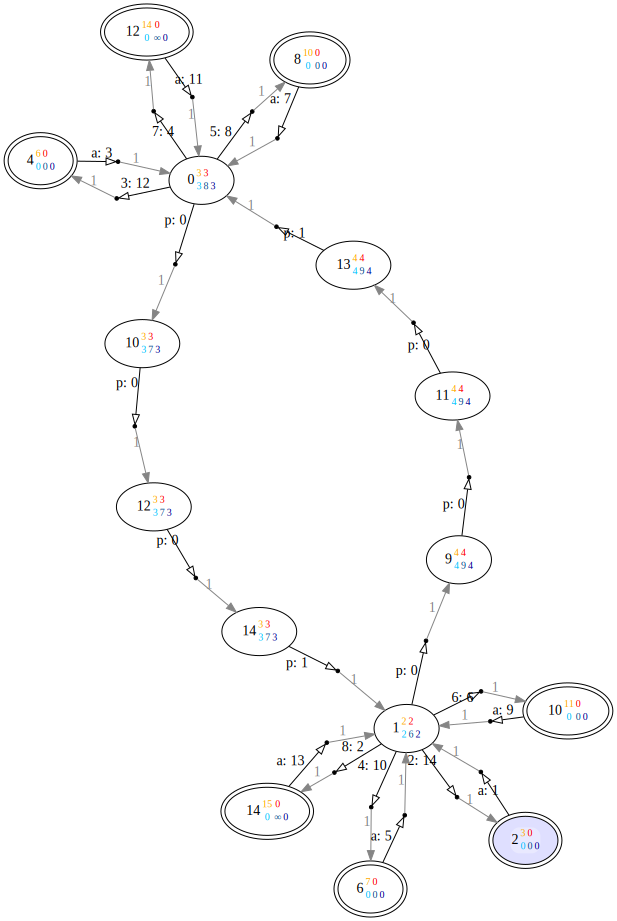

'Iteration 20:'

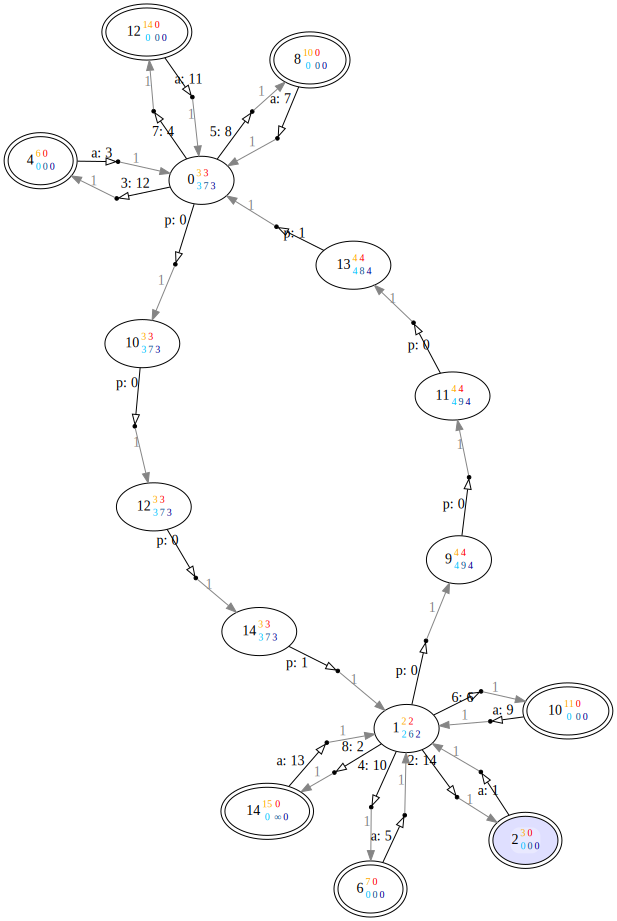

'Iteration 21:'

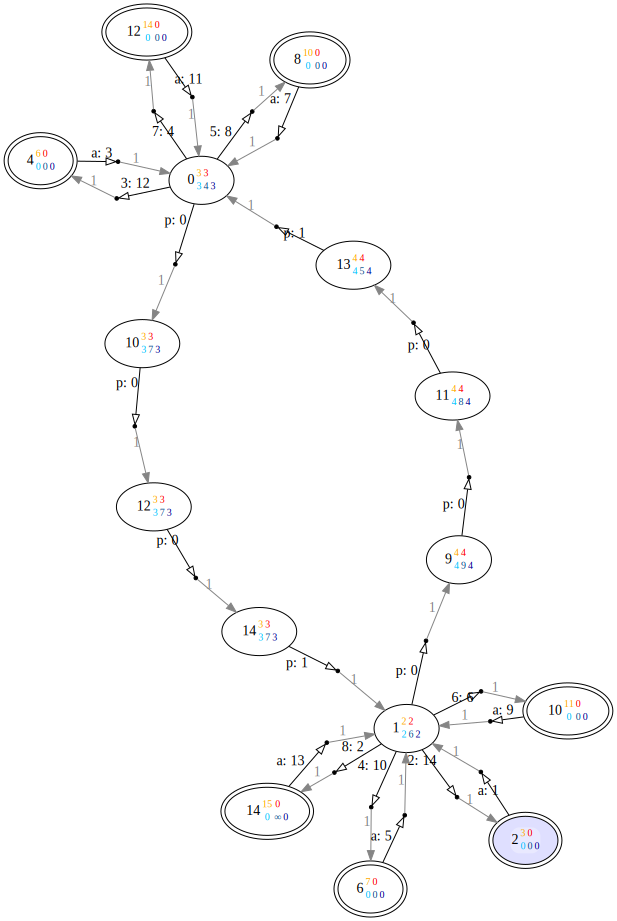

'Iteration 22:'

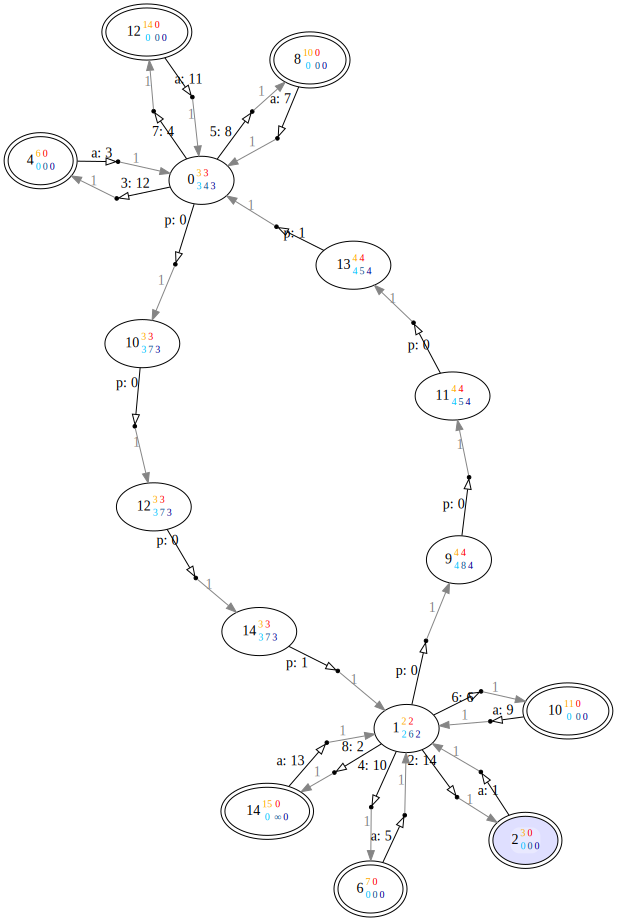

'Iteration 23:'

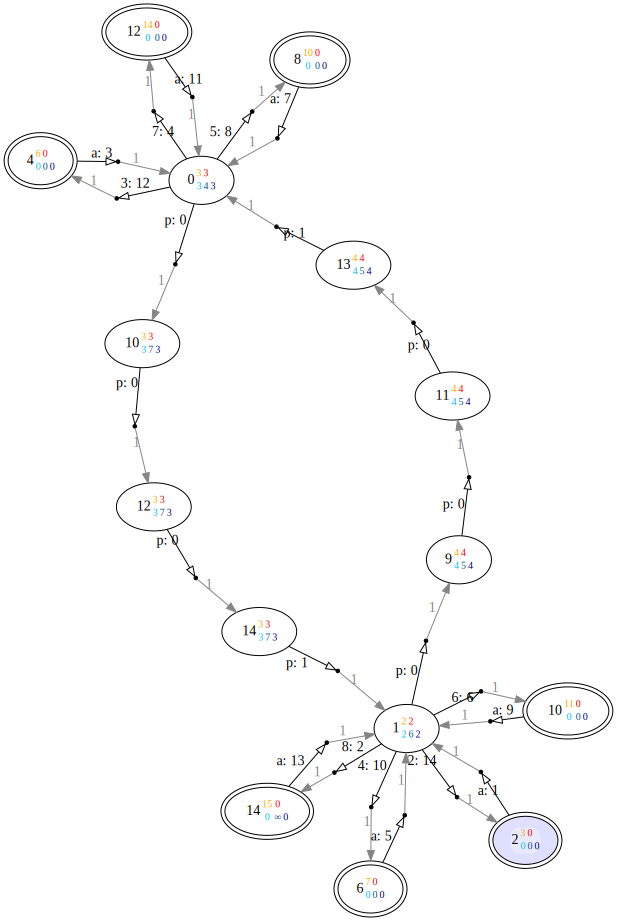

'Iteration 24:'

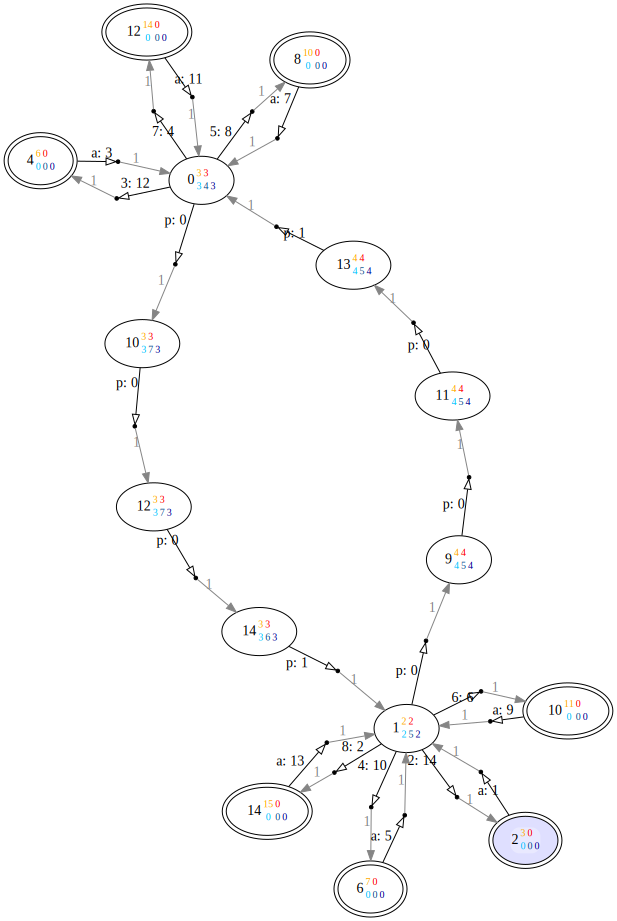

'Iteration 25:'

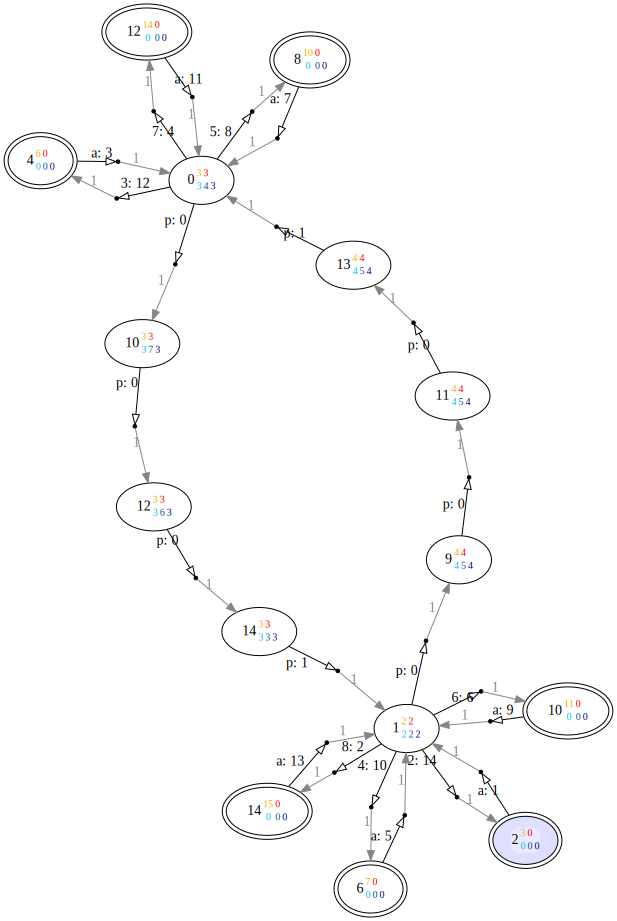

'Iteration 26:'

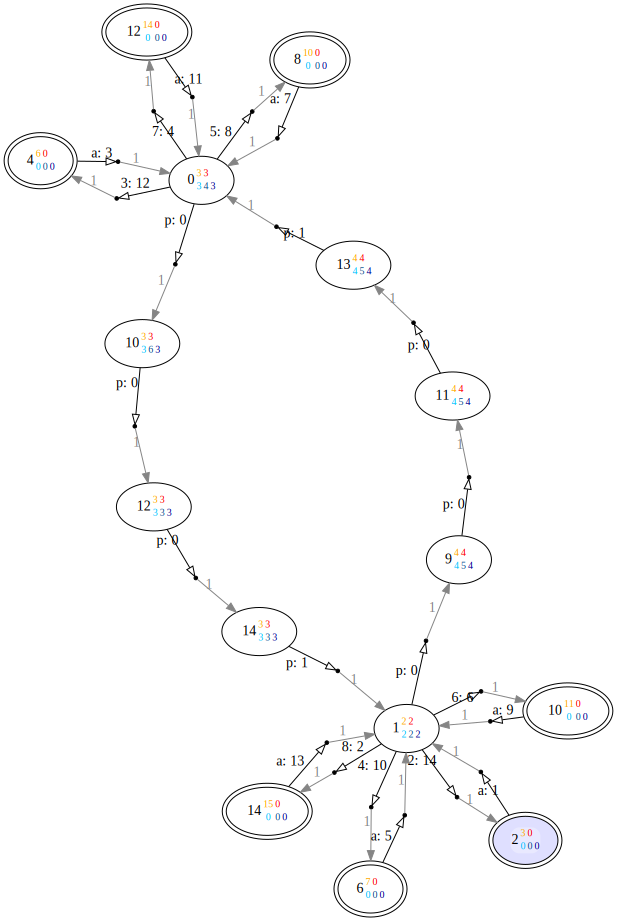

'Iteration 27:'

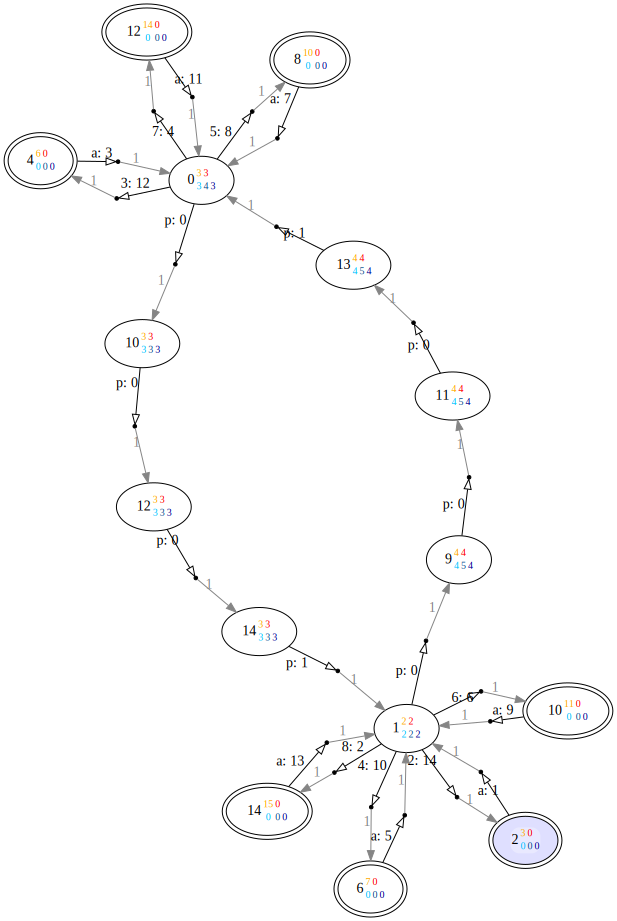

'Iteration 28:'

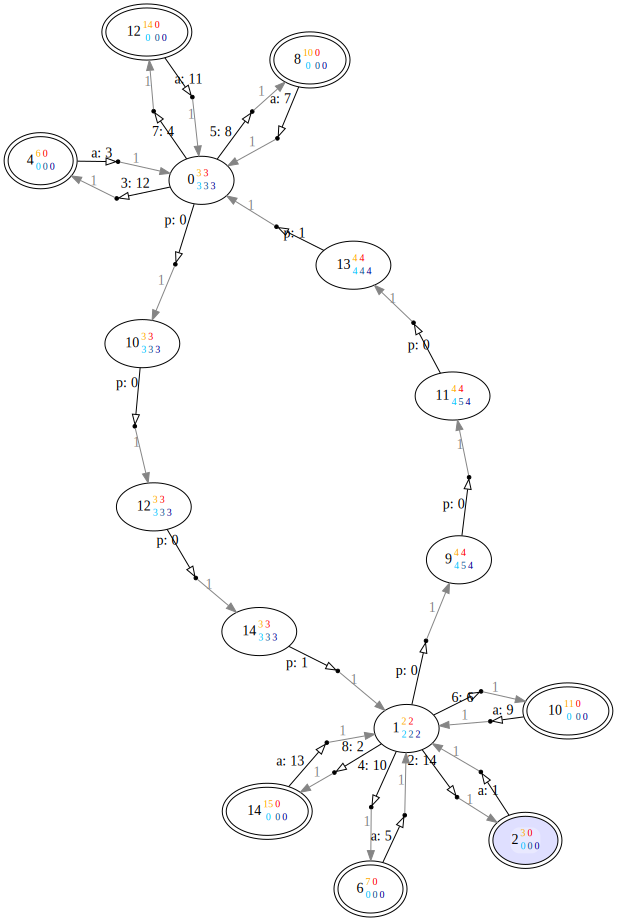

'Iteration 29:'

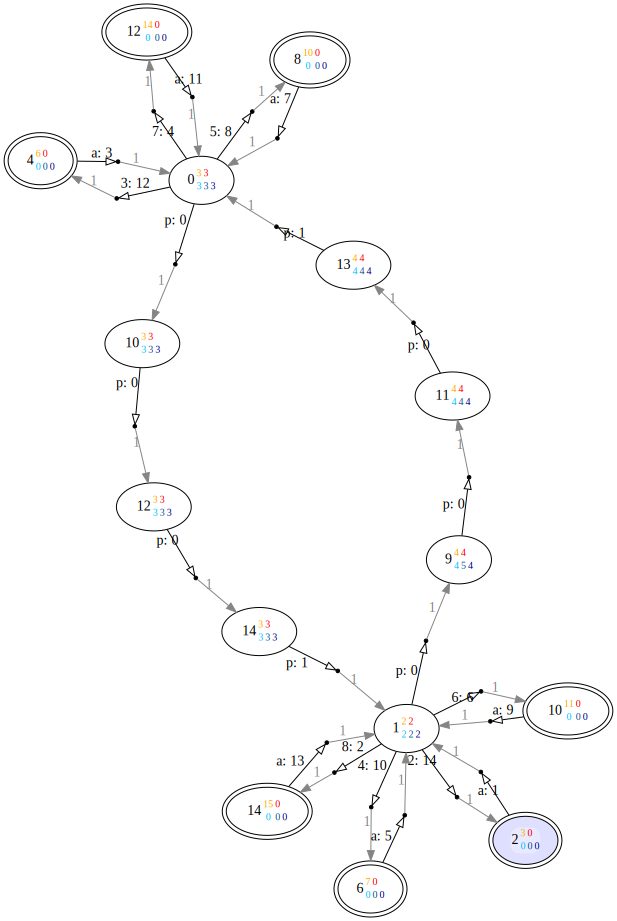

'Iteration 30:'

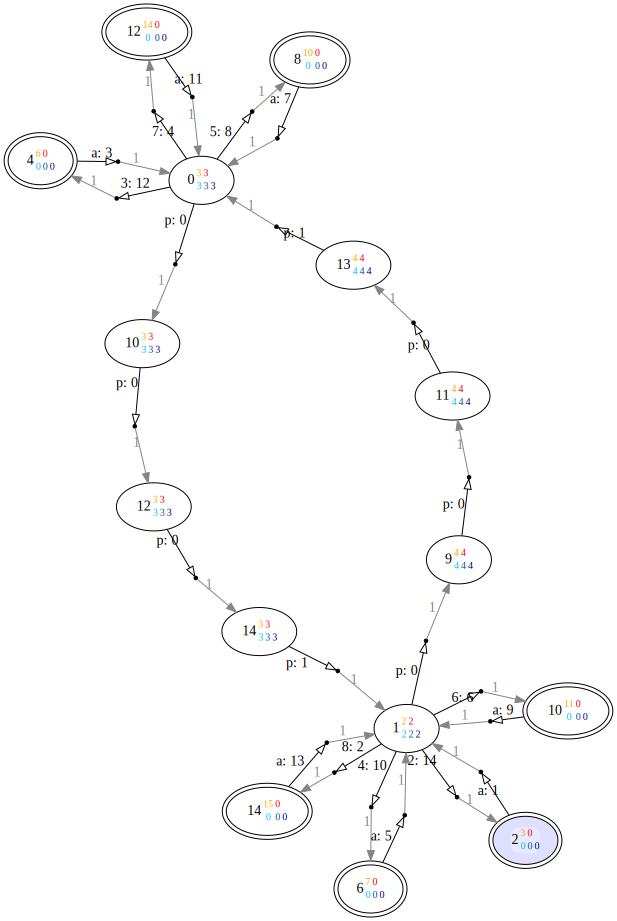

[3, 2, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 3, 4, 3]

In [10]:
el.get_almostSureReachability()